# **Clustering**

**Apa Itu Clustering?**

Clustering, atau dalam Bahasa Indonesia dikenal sebagai pengelompokan, adalah sebuah proses dalam analisis data yang bertujuan untuk mengelompokkan sekumpulan objek (data) ke dalam beberapa grup (disebut cluster) sedemikian rupa sehingga objek-objek dalam satu grup memiliki kemiripan yang tinggi satu sama lain, sementara objek-objek di grup yang berbeda memiliki kemiripan yang rendah.

**Tujuan Utama Clustering:**

1. Menemukan Struktur Tersembunyi: Mengidentifikasi pola atau struktur alami yang ada dalam data tanpa adanya label atau kategori yang sudah ditentukan sebelumnya (ini disebut unsupervised learning).

2. Segmentasi: Membagi data menjadi segmen-segmen yang lebih kecil dan lebih mudah dikelola untuk analisis lebih lanjut. Contohnya, segmentasi pelanggan berdasarkan perilaku pembelian.

3. Deteksi Anomali: Mengidentifikasi data yang tidak termasuk dalam cluster manapun (outlier) yang mungkin merupakan data yang tidak biasa atau error.

4. Penyederhanaan Data: Mengurangi kompleksitas data dengan merepresentasikan setiap cluster dengan satu prototipe atau perwakilan.

**Bagaimana Cara Kerja Clustering?**

Algoritma clustering bekerja dengan mengukur kemiripan atau ketidakmiripan (jarak) antar objek data. Beberapa metrik yang umum digunakan antara lain:

1. Jarak Euclidean: Jarak garis lurus antara dua titik dalam ruang multidimensi.

2. Jarak Manhattan: Jumlah selisih absolut dari koordinat dua titik.

3. Kemiripan Kosinus: Mengukur kosinus sudut antara dua vektor, sering digunakan untuk data teks.

Berikut merupakan contoh dari beberapa algoritma clusering berserta implementasi pada data iris.

# K-MEAN CLUSTERING

 **KONSEP LANGKAH-LANGKAH K-MEANS CLUSTERING
Tentukan jumlah cluster k**



1.   Tentukan jumlah cluster k

  *   Misalnya, k = 2 jika ingin membagi data menjadi dua kelompok.
  *   Bisa ditentukan secara manual, atau dicari optimalnya dengan elbow method atau silhouette score.
2.   Inisialisasi centroid awal
  *   Pilih k titik awal (bisa dipilih acak, atau ditentukan sendiri)
  *   Bisa ditentukan secara manual, atau dicari optimalnya dengan elbow method atau silhouette score.
3. Hitung jarak dari setiap titik ke setiap centroid
  *   Biasanya digunakan jarak Euclidean.
4. Kelompokkan titik ke centroid terdekat
  *   Setiap data akan diberi label sesuai cluster terdekat.
5. Hitung ulang centroid (rata-rata baru dari tiap cluster)
  *   Ambil rata-rata dari semua titik dalam satu cluster untuk dapatkan centroid baru.
6. Cek konvergensi
  *   Jika label cluster tidak berubah atau centroid tidak berubah secara signifikan, maka proses berhenti.
  *   Jika belum, kembali ke langkah 3.




7. Evaluasi hasil Clustering

  evaluasi bisa dilakukan dengan :
  1. Inertia (Total Within-Cluster Sum of Squares) : jumlah total dari kuadrat jarak setiap titik data ke centroid cluster-nya. Metrik ini menunjukkan seberapa dekat anggota cluster terhadap pusat cluster-nya.
    *    Tapi inertia selalu menurun jika k bertambah, jadi tidak cukup sendiri untuk menentukan k terbaik.
    *  Nilai lebih kecil = lebih baik, artinya data lebih dekat ke centroid-nya.
    
  Berikut adalah rumus menghitung Inertia
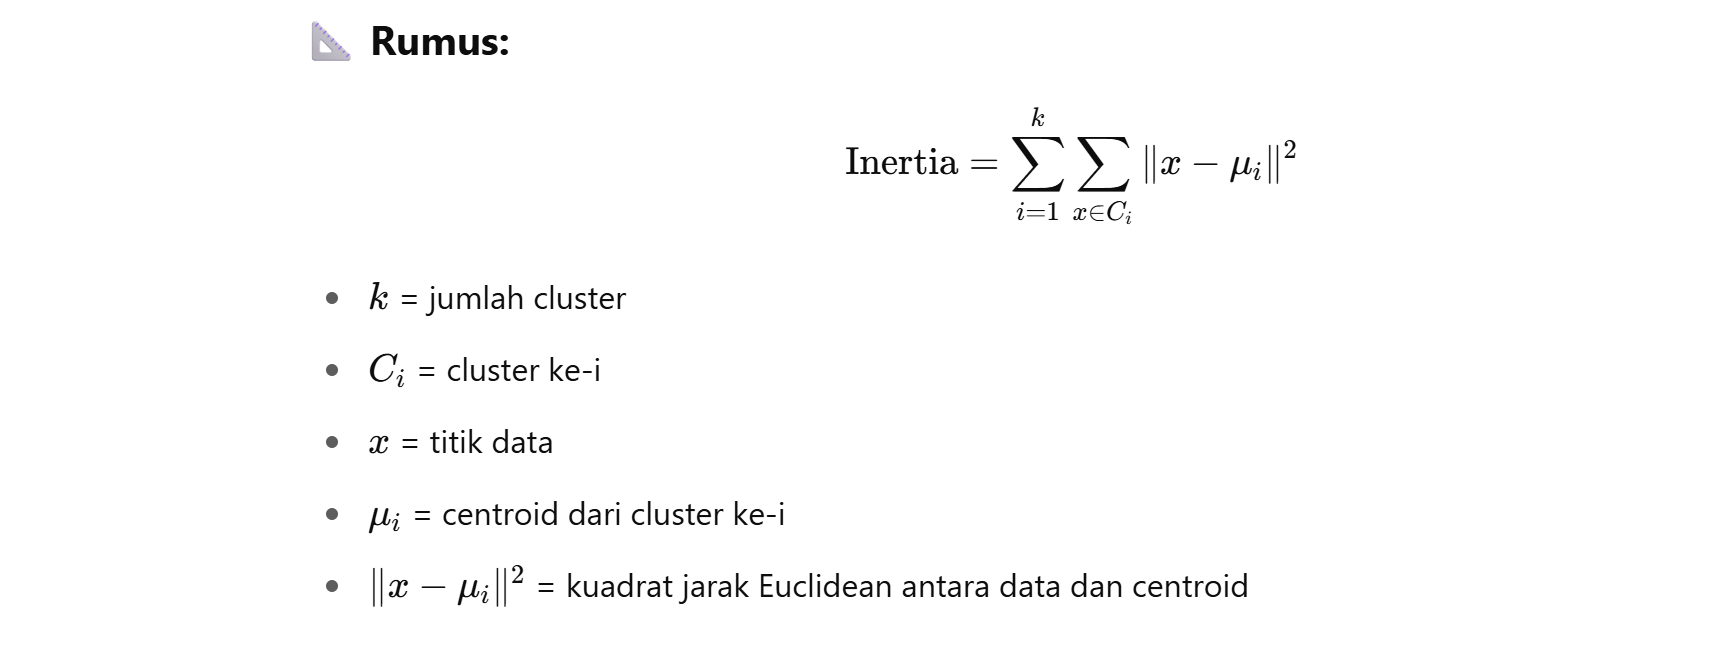

  2. Silhouette Score : Silhouette score mengukur seberapa mirip suatu data dengan cluster-nya sendiri dibanding cluster lain. Nilainya antara -1 sampai 1.
      *   ≈ 1 : Data sangat cocok dengan cluster-nya dan jauh dari cluster lain
      *   ≈ 0 : Data berada di batas antara dua cluster
      *   < 0 : Data mungkin salah tempat (lebih cocok di cluster lain)    

  Berikut rumus menghitung nilai Silhouette
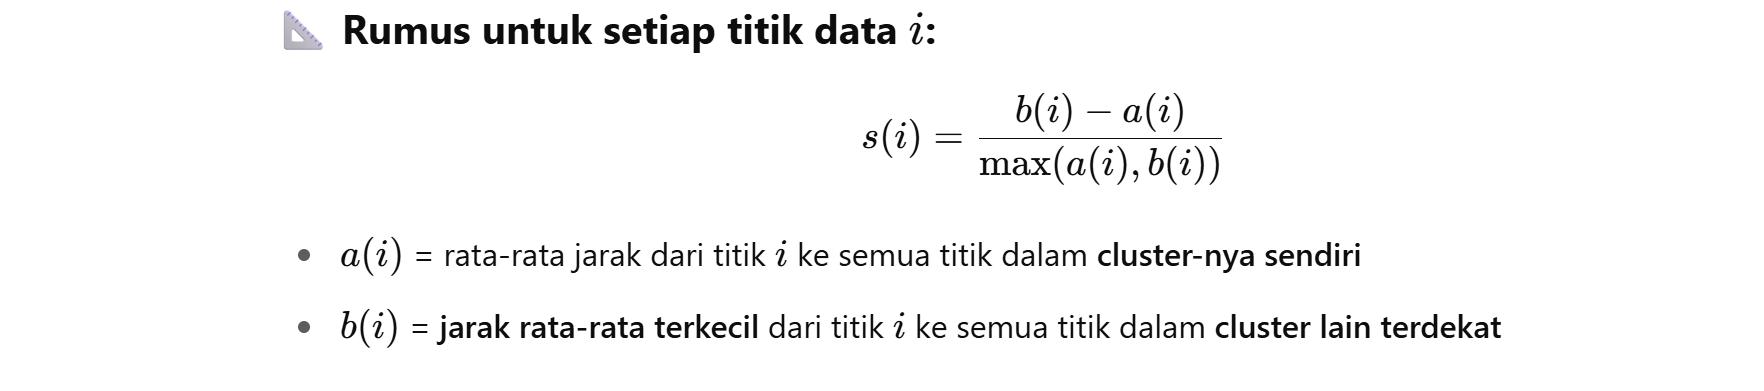



# Implementasi K-Means dengan Sklearn

## Dengan K=2

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

# Load iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Tambahkan label asli (Target)
df['Target'] = iris.target

# Normalisasi data
scaler = StandardScaler()
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
df[features] = scaler.fit_transform(df[features])

# Tentukan centroid awal manual (misal indeks 0 dan 50 untuk 2 cluster)
centroid_indices = [0, 50]
centroids = df.loc[centroid_indices, features].values

print("\nCentroid Awal:")
for i, idx in enumerate(centroid_indices, start=1):
    print(f"Centroid {i} (data ke-{idx}): {centroids[i-1]}")

max_iter = 100
tolerance = 1e-6

for iteration in range(1, max_iter + 1):
    distances = cdist(df[features].values, centroids, metric='euclidean')
    df['Cluster_Diikuti'] = np.argmin(distances, axis=1)
    new_centroids = np.array([df.loc[df['Cluster_Diikuti'] == k, features].mean().values for k in range(len(centroids))])
    centroid_shift = np.linalg.norm(new_centroids - centroids)
    print(f"Iterasi ke-{iteration}: Perubahan centroid = {centroid_shift:.8f}")
    centroids = new_centroids
    if centroid_shift < tolerance:
        print("Centroid sudah konvergen.")
        break

print("\nCentroid Akhir:")
for i, centroid in enumerate(centroids, start=1):
    print(f"Centroid {i}: {centroid}")

# Mapping cluster ke label asli berdasarkan mayoritas label dalam cluster
mapped_labels = {}
for cluster_label, group in df.groupby('Cluster_Diikuti'):
    most_common_label = group['Target'].mode()[0]
    mapped_labels[cluster_label] = most_common_label

# Buat kolom PredictedLabel hasil mapping
df['PredictedLabel'] = df['Cluster_Diikuti'].map(mapped_labels)

# Cek benar atau salah
df['IsCorrect'] = (df['PredictedLabel'] == df['Target'])

# Tampilkan jumlah benar dan salah tiap cluster
print("\nJumlah Benar dan Salah Tiap Cluster:")
for cluster_label, group in df.groupby('Cluster_Diikuti'):
    benar = group['IsCorrect'].sum()
    salah = len(group) - benar
    print(f"Cluster {cluster_label}: Total={len(group)}, Benar={benar}, Salah={salah}")

# Hitung dan tampilkan inertia (jumlah kuadrat jarak data ke centroidnya)
inertia = 0
for i in range(len(centroids)):
    cluster_points = df[df['Cluster_Diikuti'] == i][features].values
    centroid = centroids[i]
    inertia += np.sum(np.linalg.norm(cluster_points - centroid, axis=1)**2)
print(f"\nInertia: {inertia:.4f}")

# Hitung silhouette score
sil_score = silhouette_score(df[features], df['Cluster_Diikuti'])
print(f"Silhouette Score: {sil_score:.4f}")

# Tampilkan akurasi keseluruhan
total_benar = df['IsCorrect'].sum()
total_data = len(df)
akurasi = total_benar / total_data * 100
print(f"\nAkurasi keseluruhan: {akurasi:.2f}%")

# Tampilkan semua data lengkap dengan nomor urut
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df_reset = df.reset_index(drop=True)
df_reset.index += 1  # nomor urut mulai dari 1

print("\nData Lengkap dengan Nomor Urut:")
print(df_reset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Target', 'Cluster_Diikuti', 'PredictedLabel', 'IsCorrect']].to_string(index=True))


ModuleNotFoundError: No module named 'pandas'

## Dengan K=3

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

# Load iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Tambahkan label asli (Target)
df['Target'] = iris.target

# Normalisasi data
scaler = StandardScaler()
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
df[features] = scaler.fit_transform(df[features])

# Tentukan centroid awal manual (misal indeks 0, 50, dan 100 untuk 3 cluster)
centroid_indices = [0, 50, 100]
centroids = df.loc[centroid_indices, features].values

print("\nCentroid Awal:")
for i, idx in enumerate(centroid_indices, start=1):
    print(f"Centroid {i} (data ke-{idx}): {centroids[i-1]}")

max_iter = 100
tolerance = 1e-6

for iteration in range(1, max_iter + 1):
    distances = cdist(df[features].values, centroids, metric='euclidean')
    df['Cluster_Diikuti'] = np.argmin(distances, axis=1)
    new_centroids = np.array([df.loc[df['Cluster_Diikuti'] == k, features].mean().values for k in range(len(centroids))])
    centroid_shift = np.linalg.norm(new_centroids - centroids)
    print(f"Iterasi ke-{iteration}: Perubahan centroid = {centroid_shift:.8f}")
    centroids = new_centroids
    if centroid_shift < tolerance:
        print("Centroid sudah konvergen.")
        break

print("\nCentroid Akhir:")
for i, centroid in enumerate(centroids, start=1):
    print(f"Centroid {i}: {centroid}")

# Mapping cluster ke label asli berdasarkan mayoritas label dalam cluster
mapped_labels = {}
for cluster_label, group in df.groupby('Cluster_Diikuti'):
    most_common_label = group['Target'].mode()[0]
    mapped_labels[cluster_label] = most_common_label

# Buat kolom PredictedLabel hasil mapping
df['PredictedLabel'] = df['Cluster_Diikuti'].map(mapped_labels)

# Cek benar atau salah
df['IsCorrect'] = (df['PredictedLabel'] == df['Target'])

# Tampilkan jumlah benar dan salah tiap cluster
print("\nJumlah Benar dan Salah Tiap Cluster:")
for cluster_label, group in df.groupby('Cluster_Diikuti'):
    benar = group['IsCorrect'].sum()
    salah = len(group) - benar
    print(f"Cluster {cluster_label}: Total={len(group)}, Benar={benar}, Salah={salah}")

# Hitung inertia (jumlah kuadrat jarak ke centroid)
inertia = 0
for i in range(len(centroids)):
    cluster_points = df[df['Cluster_Diikuti'] == i][features].values
    centroid = centroids[i]
    inertia += np.sum(np.linalg.norm(cluster_points - centroid, axis=1)**2)
print(f"\nInertia: {inertia:.4f}")

# Hitung silhouette score
sil_score = silhouette_score(df[features], df['Cluster_Diikuti'])
print(f"Silhouette Score: {sil_score:.4f}")

# Tampilkan akurasi keseluruhan
total_benar = df['IsCorrect'].sum()
total_data = len(df)
akurasi = total_benar / total_data * 100
print(f"\nAkurasi keseluruhan: {akurasi:.2f}%")

# Tampilkan semua data lengkap dengan nomor urut
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df_reset = df.reset_index(drop=True)
df_reset.index += 1  # nomor urut mulai dari 1

print("\nData Lengkap dengan Nomor Urut:")
print(df_reset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Target', 'Cluster_Diikuti', 'PredictedLabel', 'IsCorrect']].to_string(index=True))



Centroid Awal:
Centroid 1 (data ke-0): [-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
Centroid 2 (data ke-50): [1.40150837 0.32841405 0.53540856 0.26414192]
Centroid 3 (data ke-100): [0.55333328 0.55861082 1.27429511 1.71209594]
Iterasi ke-1: Perubahan centroid = 1.52358636
Iterasi ke-2: Perubahan centroid = 0.78113007
Iterasi ke-3: Perubahan centroid = 0.18700578
Iterasi ke-4: Perubahan centroid = 0.06188676
Iterasi ke-5: Perubahan centroid = 0.03412112
Iterasi ke-6: Perubahan centroid = 0.00000000
Centroid sudah konvergen.

Centroid Akhir:
Centroid 1: [-1.01457897  0.85326268 -1.30498732 -1.25489349]
Centroid 2: [-0.01139555 -0.87600831  0.37707573  0.31115341]
Centroid 3: [1.16743407 0.14530299 1.00302557 1.0300019 ]

Jumlah Benar dan Salah Tiap Cluster:
Cluster 0: Total=50, Benar=50, Salah=0
Cluster 1: Total=56, Benar=39, Salah=17
Cluster 2: Total=44, Benar=33, Salah=11

Inertia: 140.0328
Silhouette Score: 0.4630

Akurasi keseluruhan: 81.33%

Data Lengkap dengan Nomor Urut:
   

## Dengan K=4

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

# Load iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Tambahkan label asli (Target)
df['Target'] = iris.target

# Normalisasi data
scaler = StandardScaler()
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
df[features] = scaler.fit_transform(df[features])

# Tentukan centroid awal manual (misal indeks 0, 30, 80, 120 untuk 4 cluster)
centroid_indices = [0, 30, 80, 120]
centroids = df.loc[centroid_indices, features].values

print("\nCentroid Awal:")
for i, idx in enumerate(centroid_indices, start=1):
    print(f"Centroid {i} (data ke-{idx}): {centroids[i-1]}")

max_iter = 100
tolerance = 1e-6

for iteration in range(1, max_iter + 1):
    distances = cdist(df[features].values, centroids, metric='euclidean')
    df['Cluster_Diikuti'] = np.argmin(distances, axis=1)
    new_centroids = np.array([df.loc[df['Cluster_Diikuti'] == k, features].mean().values for k in range(len(centroids))])
    centroid_shift = np.linalg.norm(new_centroids - centroids)
    print(f"Iterasi ke-{iteration}: Perubahan centroid = {centroid_shift:.8f}")
    centroids = new_centroids
    if centroid_shift < tolerance:
        print("Centroid sudah konvergen.")
        break

print("\nCentroid Akhir:")
for i, centroid in enumerate(centroids, start=1):
    print(f"Centroid {i}: {centroid}")

# Mapping cluster ke label asli berdasarkan mayoritas label dalam cluster
mapped_labels = {}
for cluster_label, group in df.groupby('Cluster_Diikuti'):
    most_common_label = group['Target'].mode()[0]
    mapped_labels[cluster_label] = most_common_label

# Buat kolom PredictedLabel hasil mapping
df['PredictedLabel'] = df['Cluster_Diikuti'].map(mapped_labels)

# Cek benar atau salah
df['IsCorrect'] = (df['PredictedLabel'] == df['Target'])

# Tampilkan jumlah benar dan salah tiap cluster
print("\nJumlah Benar dan Salah Tiap Cluster:")
for cluster_label, group in df.groupby('Cluster_Diikuti'):
    benar = group['IsCorrect'].sum()
    salah = len(group) - benar
    print(f"Cluster {cluster_label}: Total={len(group)}, Benar={benar}, Salah={salah}")

# Hitung inertia (jumlah kuadrat jarak ke centroid)
inertia = 0
for i in range(len(centroids)):
    cluster_points = df[df['Cluster_Diikuti'] == i][features].values
    centroid = centroids[i]
    inertia += np.sum(np.linalg.norm(cluster_points - centroid, axis=1)**2)
print(f"\nInertia: {inertia:.4f}")

# Hitung silhouette score
sil_score = silhouette_score(df[features], df['Cluster_Diikuti'])
print(f"Silhouette Score: {sil_score:.4f}")

# Tampilkan akurasi keseluruhan
total_benar = df['IsCorrect'].sum()
total_data = len(df)
akurasi = total_benar / total_data * 100
print(f"\nAkurasi keseluruhan: {akurasi:.2f}%")

# Tampilkan semua data lengkap dengan nomor urut
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df_reset = df.reset_index(drop=True)
df_reset.index += 1  # nomor urut mulai dari 1

print("\nData Lengkap dengan Nomor Urut:")
print(df_reset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Target', 'Cluster_Diikuti', 'PredictedLabel', 'IsCorrect']].to_string(index=True))



Centroid Awal:
Centroid 1 (data ke-0): [-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
Centroid 2 (data ke-30): [-1.26418478  0.09821729 -1.22655167 -1.3154443 ]
Centroid 3 (data ke-80): [-0.41600969 -1.51316008  0.02387172 -0.13075464]
Centroid 4 (data ke-120): [1.2803405  0.32841405 1.10378283 1.44883158]
Iterasi ke-1: Perubahan centroid = 1.07553368
Iterasi ke-2: Perubahan centroid = 0.10746242
Iterasi ke-3: Perubahan centroid = 0.07339724
Iterasi ke-4: Perubahan centroid = 0.08954944
Iterasi ke-5: Perubahan centroid = 0.00000000
Centroid sudah konvergen.

Centroid Akhir:
Centroid 1: [-0.74922133  1.43007001 -1.29759846 -1.22142131]
Centroid 2: [-1.35230687  0.11914427 -1.31439133 -1.29749445]
Centroid 3: [-0.07723421 -0.93062132  0.32313817  0.23727821]
Centroid 4: [1.06889068 0.05759433 0.96893325 1.00231456]

Jumlah Benar dan Salah Tiap Cluster:
Cluster 0: Total=28, Benar=28, Salah=0
Cluster 1: Total=22, Benar=22, Salah=0
Cluster 2: Total=49, Benar=38, Salah=11
Cluster 3: Tota

## Visualisasi

### Visualisasi Menggunakan Scatter Plot


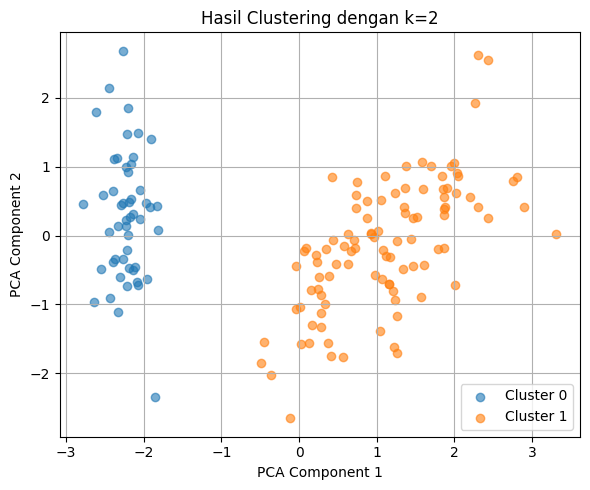

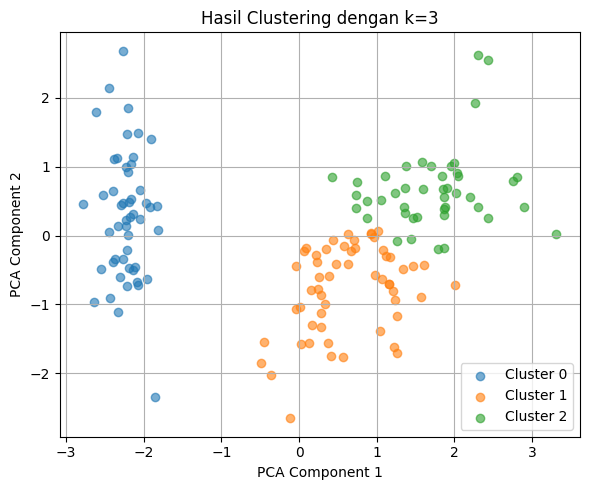

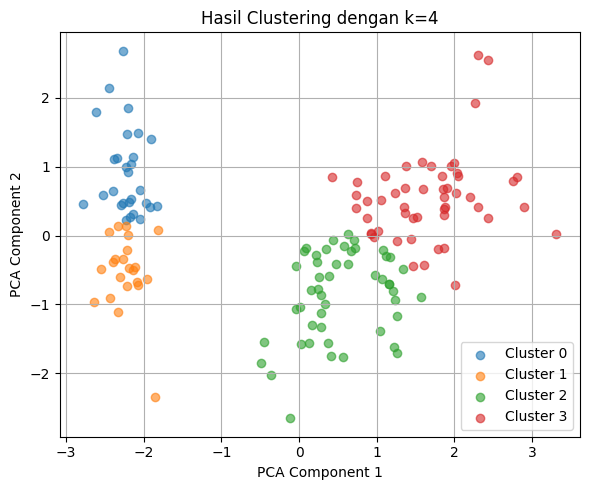

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fungsi visualisasi hasil clustering
def plot_clusters(df, title):
    pca = PCA(n_components=2)
    components = pca.fit_transform(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
    df['PCA1'] = components[:, 0]
    df['PCA2'] = components[:, 1]

    plt.figure(figsize=(6, 5))
    for cluster in sorted(df['Cluster_Diikuti'].unique()):
        cluster_data = df[df['Cluster_Diikuti'] == cluster]
        plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', alpha=0.6)

    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Load dan normalisasi data
iris = load_iris()
df_original = pd.DataFrame(iris.data, columns=iris.feature_names)
df_original.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
df_original['Target'] = iris.target
scaler = StandardScaler()
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
df_original[features] = scaler.fit_transform(df_original[features])

# Daftar konfigurasi k dan indeks centroid awalnya
configs = {
    2: [0, 50],
    3: [0, 50, 100],
    4: [0, 30, 80, 120]
}

# Visualisasi setiap k
for k, indices in configs.items():
    df = df_original.copy()
    centroids = df.loc[indices, features].values

    for iteration in range(100):
        distances = cdist(df[features].values, centroids, metric='euclidean')
        df['Cluster_Diikuti'] = np.argmin(distances, axis=1)
        new_centroids = np.array([df.loc[df['Cluster_Diikuti'] == i, features].mean().values for i in range(len(centroids))])
        if np.linalg.norm(new_centroids - centroids) < 1e-6:
            break
        centroids = new_centroids

    plot_clusters(df, f'Hasil Clustering dengan k={k}')


### Visualisasi Menggunakan Elbow Method
Elbow Method adalah salah satu teknik yang digunakan untuk menentukan jumlah klaster (jumlah k) yang optimal dalam algoritma K-Means Clustering.

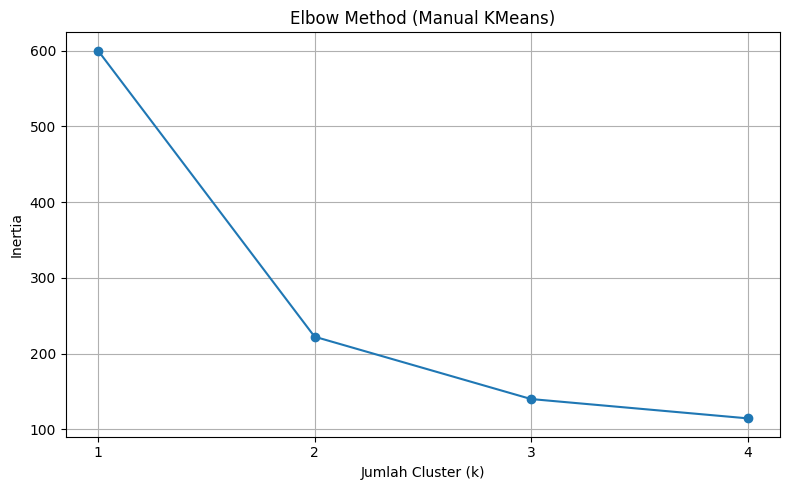

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# Load dan normalisasi data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
df.columns = features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Fungsi KMeans manual dengan centroid acak dan inertia
def manual_kmeans(data, k, max_iter=100, tol=1e-6):
    np.random.seed(42)
    centroid_indices = np.random.choice(len(data), k, replace=False)
    centroids = data[centroid_indices]

    for _ in range(max_iter):
        distances = cdist(data, centroids, 'euclidean')
        cluster_labels = np.argmin(distances, axis=1)

        new_centroids = np.array([data[cluster_labels == i].mean(axis=0) for i in range(k)])
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids

    # Hitung inertia (jumlah kuadrat jarak tiap titik ke centroid-nya)
    inertia = 0
    for i in range(k):
        cluster_points = data[cluster_labels == i]
        centroid = centroids[i]
        inertia += np.sum((np.linalg.norm(cluster_points - centroid, axis=1))**2)

    return inertia

# Hitung inertia untuk k=1 sampai 10
X = df[features].values
inertias = []
ks = range(1, 5)

for k in ks:
    inertia = manual_kmeans(X, k)
    inertias.append(inertia)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(ks, inertias, marker='o')
plt.title('Elbow Method (Manual KMeans)')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.grid(True)
plt.tight_layout()
plt.show()


## Evaluasi Keseluruhan

**Evaluasi K-Means Clustering Berdasarkan Hasil Perhitungan**

Dasar Evaluasi :
1. Inertia: Semakin kecil inertia, semakin baik (cluster lebih kompak).
2. Silhouette Score: semakin mendekati 1, semakin baik kualitas clustering-nya.
---
1. K=2 :
  *   Inertia: 222.3617
  *   Silhouette Score: 0.5818
  *   Akurasi keseluruhan: 66.67%
  *   Distribusi cluster
    *  Cluster 0: Total = 50, Benar = 50 (100%)
    *   Cluster 1: Total = 100, Benar = 50 (50%)

  Penjelasan:
  *   Silhouette Score tertinggi menunjukkan struktur cluster cukup jelas.
  *   Namun, akurasi masih rendah, karena hanya satu cluster (0) yang terkelompok dengan baik, sementara cluster lainnya tercampur.

2. K=3 :
  *   Inertia: 140.0328 (lebih baik dari k=2)
  *   Silhouette Score: 0.4630 (turun dari k=2)
  *  Akurasi: 81.33%
  *   Distribusi cluster
    *  Cluster 0: 50 data, Benar = 50 (100%)
    *  Cluster 1: 56 data, Benar = 39 (69.64%)
    *  Cluster 2: 44 data, Benar = 33 (75%)

  Penjelasan:
  *   Inertia lebih rendah → cluster lebih kompak.menunjukkan struktur cluster cukup jelas.
  *   Akurasi meningkat signifikan.
  *   Silhouette menurun, menunjukkan beberapa cluster mulai beririsan.
  *   Terdapat keseimbangan antara performa pemisahan dan komposisi cluster.

3. K=4 :
  *   Inertia: 114.3541 (paling rendah)
  *   Silhouette Score: 0.3850 (paling rendah)
  *  Akurasi: 84.67%
  *   Distribusi cluster
    *  Cluster 0: Total=28, Benar=28, Salah=0
    *  Cluster 1: Total=22, Benar=22, Salah=0
    *  Cluster 2: Benar = 38 dari 49 (77.55%)
    * Cluster 3: Benar = 39 dari 51 (76.47%)

  Penjelasan:
  *   Akurasi tertinggi, tapi Silhouette Score rendah, menunjukkan overfitting dan pemisahan cluster yang kurang alami.
  *   Penurunan Silhouette Score berarti cluster tidak saling terpisah dengan baik.
  *   Penambahan jumlah cluster meningkatkan akurasi tetapi menurunkan kualitas struktur cluster.


---


**Kesimpulan: Jumlah Cluster (k) Terbaik**

k = 3 adalah pilihan terbaik secara keseluruhan karena:

1.   Memberikan keseimbangan terbaik antara akurasi, struktur cluster, dan kompaknya data (inertia).
2.  Tidak terjadi overfitting seperti pada k=4.
3. Silhouette Score masih berada pada level moderat, menandakan pemisahan cluster masih cukup alami.

---

❓Apakah K-Means Efektif untuk Data Ini?

Jawaban:

✅ Ya, metode K-Means cukup efektif, dengan catatan:

*   K-Means mampu mengelompokkan data dengan akurasi cukup tinggi (hingga 84.67%) tanpa bantuan label asli.
*  Cluster menunjukkan struktur yang cukup jelas terutama saat k=3.
*   Namun, karena K-Means hanya mempertimbangkan jarak (euclidean), efektivitas bisa menurun jika fitur data tidak linear atau tidak terdistribusi secara bulat.
*   Performa juga sangat bergantung pada pemilihan jumlah cluster (k) yang tepat dan normalisasi data sebelumnya.













# Fuzzy C-Means

## Konsep Fuzzy C-Means
Fuzzy C-Means adalah metode pengelompokan (clustering) data yang merupakan pengembangan dari metode K-Means. Perbedaan utamanya terletak pada konsep "fuzzy" atau "kabur."

Fuzzy C-Means memungkinkan setiap titik data memiliki derajat keanggotaan yang berbeda untuk setiap cluster. Artinya, satu titik data bisa menjadi anggota dari beberapa cluster sekaligus, meskipun dengan tingkat keanggotaan yang berbeda-beda (misalnya, 80% masuk ke cluster A dan 20% masuk ke cluster B). Derajat keanggotaan ini biasanya direpresentasikan sebagai nilai real antara 0 dan 1, di mana 1 berarti keanggotaan penuh dan 0 berarti tidak menjadi anggota sama sekali.

Langkah Algoritma Fuzzy C-means

1. Inisialisasi:

  **Tujuan**: Menentukan parameter awal dan membuat matriks keanggotaan acak.
*   Tentukan jumlah cluster
𝑐 (misalnya 3)
*   Tentukan parameter fuzziness 𝑚 > 1 (umumnya
𝑚 = 2).
*  Tentukan batas toleransi
𝜖 (misal 0.01).
*  Tentukan jumlah maksimum iterasi.
*  Buat matriks keanggotaan acak dengan syarat setiap baris harus dinormalisasi agar jumlahnya 1 :
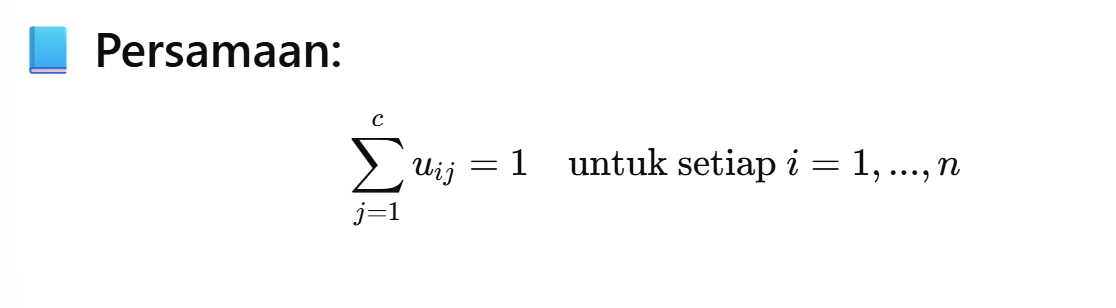

| Simbol           | Arti                                                    |
| ---------------- | ------------------------------------------------------- |
| $\sum_{j=1}^{c}$ | Penjumlahan untuk semua cluster $j$ dari 1 sampai $c$   |
| $u_{ij}$         | Derajat keanggotaan data ke-$i$ terhadap cluster ke-$j$ |
| $c$              | Jumlah cluster                                          |
| $i$              | Indeks data (baris data ke-$i$)                         |
| $n$              | Jumlah total data                                       |





2.  Hitung Pusat (Centroid) Tiap Cluster
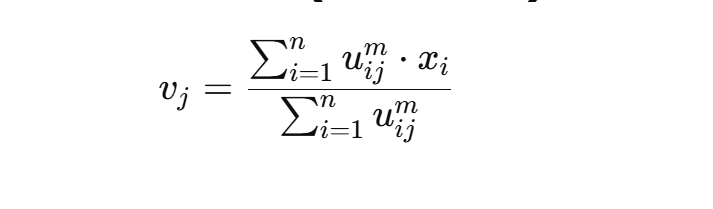

Arti Simbol

| Simbol   | Arti                                                                           |
| -------- | ------------------------------------------------------------------------------ |
| $v_j$    | Titik pusat cluster ke-j                                                       |
| $x_i$    | Data ke-i dalam bentuk vektor (misalnya $x_i = (x_{i1}, x_{i2}, ..., x_{id})$) |
| $u_{ij}$ | Derajat keanggotaan data ke-i terhadap cluster ke-j                            |
| $m$      | Fuzziness (mengatur tingkat ketidakpastian)                                    |
| $n$      | Jumlah data                                                                    |


3. Update Derajat Keanggotaan
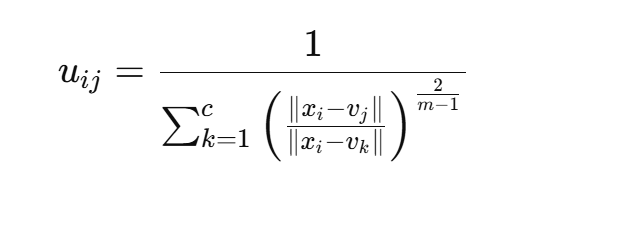

Arti Simbol

| Simbol          | Arti                                                           |
| --------------- | -------------------------------------------------------------- |
| $u_{ij}$        | Derajat keanggotaan data ke-i pada cluster ke-j                |
| $x_i$           | Data ke-i                                                      |
| $v_j$, $v_k$    | Pusat cluster ke-j dan ke-k                                    |
| $\|x_i - v_j\|$ | Jarak antara data ke-i dan pusat cluster ke-j                  |
| $m$             | Parameter fuzziness                                            |
| $c$             | Jumlah cluster                                                 |
| $k$             | Indeks pengulangan untuk semua cluster (digunakan di penyebut) |


4.  Hitung Fungsi Objektif

  **Tujuan**: Mengevaluasi seberapa baik hasil clustering pada iterasi saat ini.
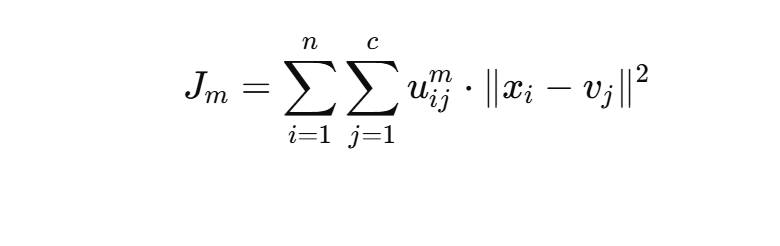

Arti Simbol

| Simbol          | Arti                                                    |
| --------------- | ------------------------------------------------------- |
| $J_m$           | Nilai fungsi objektif (total kesalahan clustering)      |
| $n$             | Jumlah data (data point)                                |
| $c$             | Jumlah cluster                                          |
| $u_{ij}$        | Derajat keanggotaan data ke-i terhadap cluster ke-j     |
| $m$             | Parameter fuzziness (> 1, biasanya 2)                   |
| $x_i$           | Vektor data ke-i                                        |
| $v_j$           | Pusat cluster ke-j                                      |
| $\|x_i - v_j\|$ | Jarak Euclidean antara data ke-i dan pusat cluster ke-j |


5.  Cek Konvergensi

  **Tujuan**: Menentukan apakah iterasi dihentikan atau dilanjutkan.

  Cek apakah perubahan keanggotaan antara dua iterasi cukup kecil:
  * Jika iya → selesai
  * Jika tidak → ulang dari Langkah 2

6. Tentukan Hasil Akhir

  Output:
  * Matriks keanggotaan akhir
𝑈

  * Centroid tiap cluster
  * Label cluster tiap data



## Contoh


**Data**

| dataxi | x1 | x2 |
| ------ | -- | -- |
| 1      | 1  | 2  |
| 2      | 3  | 4  |
| 3      | 3  | 4  |
| 4      | 6  | 7  |
| 5      | 7  | 8  |

Jumlah klaster c = 2

Parameter fuzzy m = 2 (umum digunakan)


### Data tidak dinormalisasi

In [ ]:
import numpy as np

# ======== LANGKAH 1: Inisialisasi data ========
X = np.array([[1, 2],
              [3, 4],
              [3, 4],
              [6, 7],
              [7, 8]])  # Data yang akan diklaster

# ======== LANGKAH 2: Inisialisasi acak matriks partisi U ========
np.random.seed(42)  # Agar hasil acak konsisten setiap dijalankan
n_samples = X.shape[0]  # Jumlah data (n)
n_clusters = 2          # Jumlah cluster (c)
# Matriks keanggotaan U dengan nilai awal di-random tapi ternormalisasi (∑u_ij = 1 untuk setiap i)
U = np.random.dirichlet(np.ones(n_clusters), size=n_samples)

# ======== LANGKAH 3: Menentukan parameter algoritma ========
m = 2  # Parameter fuzziness (biasanya m > 1)
max_iter = 100  # Jumlah maksimal iterasi
epsilon = 1e-05  # Ambang batas konvergensi fungsi objektif

# ======== LANGKAH 4: Fungsi untuk menghitung centroid tiap cluster ========
def compute_centroids(U, X, m):
    Um = U ** m  # U dipangkatkan m (U^m)
    centroids = []
    for j in range(U.shape[1]):  # Untuk setiap cluster j
        numerator = np.zeros(X.shape[1])  # Penjumlahan vektor data * bobot
        denominator = 0.0
        for i in range(X.shape[0]):  # Untuk setiap data i
            weight = Um[i, j]
            numerator += weight * X[i]
            denominator += weight
        centroid = numerator / denominator  # Rumus centroid v_j
        centroids.append(centroid)
    return np.array(centroids)

# ======== LANGKAH 5: Fungsi untuk memperbarui matriks keanggotaan U ========
def update_membership(X, centroids, m):
    n = X.shape[0]
    c = centroids.shape[0]
    U_new = np.zeros((n, c))
    for i in range(n):  # Untuk setiap data i
        for j in range(c):  # Untuk setiap cluster j
            dist_ij = np.linalg.norm(X[i] - centroids[j]) + 1e-6  # Jarak data ke centroid (hindari div 0)
            denom = 0
            for k in range(c):
                dist_ik = np.linalg.norm(X[i] - centroids[k]) + 1e-6
                denom += (dist_ij / dist_ik) ** (2 / (m - 1))  # Bagian bawah rumus u_ij
            U_new[i, j] = 1 / denom  # Rumus u_ij
    return U_new

# ======== LANGKAH 6: Fungsi untuk menghitung nilai fungsi objektif ========
def objective_function(U, X, centroids, m):
    J = 0
    Um = U ** m
    for i in range(X.shape[0]):
        for j in range(centroids.shape[0]):
            dist = np.linalg.norm(X[i] - centroids[j])
            J += Um[i, j] * (dist ** 2)  # Rumus fungsi objektif J_m
    return J

# ======== LANGKAH 7: Iterasi utama FCM hingga konvergen ========
iterasi = 0
J_prev = float('inf')  # Inisialisasi nilai fungsi objektif sebelumnya

while iterasi < max_iter:
    # Langkah 7a: Hitung centroid baru
    centroids = compute_centroids(U, X, m)

    # Langkah 7b: Perbarui matriks keanggotaan
    U_new = update_membership(X, centroids, m)

    # Langkah 7c: Hitung fungsi objektif J_m
    J = objective_function(U_new, X, centroids, m)

    # Langkah 7d: Periksa perubahan fungsi objektif
    diff = abs(J_prev - J)

    # Output proses iterasi (debug/info)
    print(f"Iterasi {iterasi+1}:")
    print("Centroids:\n", centroids)
    print("Matriks Keanggotaan U:\n", U_new)
    print(f"Fungsi Objektif: {J:.6f}")
    print(f"Perubahan fungsi objektif (|J_prev - J|): {diff:.8f}")
    print(f"Apakah perubahan < epsilon ({epsilon})? {'Ya' if diff < epsilon else 'Tidak'}\n")

    # Langkah 7e: Cek kondisi konvergensi
    if diff < epsilon:
        print("Konvergen.")
        break

    # Persiapan iterasi selanjutnya
    U = U_new
    J_prev = J
    iterasi += 1

if iterasi == max_iter:
    print("Maksimal iterasi tercapai.")

# ======== LANGKAH 8: Penentuan cluster akhir berdasarkan u_ij terbesar ========
cluster_assignment = np.argmax(U, axis=1)

print("\nHasil Akhir Penentuan Cluster Data:")
for i, c in enumerate(cluster_assignment):
    print(f"Data ke-{i+1} ({X[i]}): masuk cluster {c+1}")


Iterasi 1:
Centroids:
 [[3.87052387 4.87052387]
 [4.08482352 5.08482352]]
Matriks Keanggotaan U:
 [[0.53593786 0.46406214]
 [0.60829585 0.39170415]
 [0.60829585 0.39170415]
 [0.44716489 0.55283511]
 [0.46459175 0.53540825]]
Fungsi Objektif: 23.831612
Perubahan fungsi objektif (|J_prev - J|): inf
Apakah perubahan < epsilon (1e-05)? Tidak

Iterasi 2:
Centroids:
 [[3.61590009 4.61590009]
 [4.46506143 5.46506143]]
Matriks Keanggotaan U:
 [[0.63697162 0.36302838]
 [0.84981286 0.15018714]
 [0.84981286 0.15018714]
 [0.29304056 0.70695944]
 [0.35943046 0.64056954]]
Fungsi Objektif: 21.570691
Perubahan fungsi objektif (|J_prev - J|): 2.26092032
Apakah perubahan < epsilon (1e-05)? Tidak

Iterasi 3:
Centroids:
 [[2.98204188 3.98204188]
 [5.64678232 6.64678232]]
Matriks Keanggotaan U:
 [[8.46068739e-01 1.53931261e-01]
 [9.99953964e-01 4.60361617e-05]
 [9.99953964e-01 4.60361617e-05]
 [1.35129873e-02 9.86487013e-01]
 [1.01873732e-01 8.98126268e-01]]
Fungsi Objektif: 10.184284
Perubahan fungsi objek

### Data dinormalisasi

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# === LANGKAH 1: Data Asli ===
X = np.array([[1, 2],
              [3, 4],
              [3, 4],
              [6, 7],
              [7, 8]])

# === LANGKAH 2: Normalisasi Data ===
# Digunakan Min-Max Scaling agar semua fitur berada pada rentang [0, 1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# === Tampilkan hasil normalisasi ===
print("Data setelah dinormalisasi (Min-Max Scaling):")
for i, x in enumerate(X):
    print(f"Data ke-{i+1}: {x}")
print()

# === LANGKAH 3: Inisialisasi Parameter dan Matriks Keanggotaan (U) ===
np.random.seed(42)
n_samples = X.shape[0]     # Jumlah data (n)
n_clusters = 2             # Jumlah cluster (c)
m = 2.0                    # Parameter fuzziness
epsilon = 1e-5             # Ambang konvergensi
max_iter = 100             # Iterasi maksimum
# Matriks keanggotaan awal (U), dibuat random tetapi ternormalisasi (∑u_ij = 1 per baris)
U = np.random.dirichlet(np.ones(n_clusters), size=n_samples)

# === LANGKAH 4: Fungsi Menghitung Centroid Berdasarkan U dan X ===
def compute_centroids(U, X, m):
    Um = U ** m  # U dipangkatkan m (fuzzy weighting)
    centroids = []
    for j in range(U.shape[1]):  # untuk setiap cluster j
        numerator = np.zeros(X.shape[1])
        denominator = 0.0
        for i in range(X.shape[0]):  # untuk setiap data i
            weight = Um[i, j]
            numerator += weight * X[i]
            denominator += weight
        centroid = numerator / denominator  # Rumus centroid v_j
        centroids.append(centroid)
    return np.array(centroids)

# === LANGKAH 5: Fungsi untuk Update Matriks Keanggotaan (U) ===
def update_membership(X, centroids, m):
    n = X.shape[0]
    c = centroids.shape[0]
    U_new = np.zeros((n, c))
    for i in range(n):      # untuk setiap data i
        for j in range(c):  # untuk setiap cluster j
            dist_ij = np.linalg.norm(X[i] - centroids[j]) + 1e-6  # jarak data i ke centroid j
            denom = 0
            for k in range(c):  # untuk semua centroid k
                dist_ik = np.linalg.norm(X[i] - centroids[k]) + 1e-6
                denom += (dist_ij / dist_ik) ** (2 / (m - 1))  # bagian bawah dari rumus u_ij
            U_new[i, j] = 1 / denom  # rumus u_ij
    return U_new

# === LANGKAH 6: Fungsi Menghitung Nilai Fungsi Objektif J_m ===
def objective_function(U, X, centroids, m):
    J = 0
    Um = U ** m
    for i in range(X.shape[0]):
        for j in range(centroids.shape[0]):
            dist = np.linalg.norm(X[i] - centroids[j])
            J += Um[i, j] * (dist ** 2)  # rumus fungsi objektif
    return J

# === LANGKAH 7: Proses Iteratif Sampai Konvergen atau Mencapai Maks Iterasi ===
iterasi = 0
J_prev = float('inf')

while iterasi < max_iter:
    # 7a. Hitung centroid baru
    centroids = compute_centroids(U, X, m)

    # 7b. Update U berdasarkan centroid terbaru
    U_new = update_membership(X, centroids, m)

    # 7c. Hitung nilai fungsi objektif J
    J = objective_function(U_new, X, centroids, m)

    # 7d. Hitung selisih perubahan J
    diff = abs(J_prev - J)

    # Debug output
    print(f"Iterasi {iterasi+1}:")
    print("Centroids:\n", centroids)
    print("Matriks Keanggotaan U:\n", U_new)
    print(f"Fungsi Objektif: {J:.6f}")
    print(f"Perubahan fungsi objektif (|J_prev - J|): {diff:.8f}")
    print(f"Apakah perubahan < epsilon ({epsilon})? {'Ya' if diff < epsilon else 'Tidak'}\n")

    # 7e. Cek konvergensi
    if diff < epsilon:
        print("Konvergen.\n")
        U = U_new  # Simpan U akhir sebelum keluar
        break

    # Siapkan untuk iterasi berikutnya
    U = U_new
    J_prev = J
    iterasi += 1

# 7f. Jika iterasi maksimum tercapai
if iterasi == max_iter:
    print("Maksimal iterasi tercapai.\n")

# === LANGKAH 8: Penentuan Cluster Akhir (argmax dari keanggotaan tiap data) ===
cluster_assignment = np.argmax(U, axis=1)

print("Hasil Akhir Penentuan Cluster Data:")
for i, c in enumerate(cluster_assignment):
    print(f"Data ke-{i+1} ({X[i]}): masuk cluster {c+1}")


Data setelah dinormalisasi (Min-Max Scaling):
Data ke-1: [0. 0.]
Data ke-2: [0.33333333 0.33333333]
Data ke-3: [0.33333333 0.33333333]
Data ke-4: [0.83333333 0.83333333]
Data ke-5: [1. 1.]

Iterasi 1:
Centroids:
 [[0.47842064 0.47842064]
 [0.51413725 0.51413725]]
Matriks Keanggotaan U:
 [[0.53593782 0.46406218]
 [0.60829547 0.39170453]
 [0.60829547 0.39170453]
 [0.44716498 0.55283502]
 [0.46459179 0.53540821]]
Fungsi Objektif: 0.661989
Perubahan fungsi objektif (|J_prev - J|): inf
Apakah perubahan < epsilon (1e-05)? Tidak

Iterasi 2:
Centroids:
 [[0.43598347 0.43598347]
 [0.57751005 0.57751005]]
Matriks Keanggotaan U:
 [[0.63697119 0.36302881]
 [0.84981152 0.15018848]
 [0.84981152 0.15018848]
 [0.29304133 0.70695867]
 [0.35943092 0.64056908]]
Fungsi Objektif: 0.599186
Perubahan fungsi objektif (|J_prev - J|): 0.06280308
Apakah perubahan < epsilon (1e-05)? Tidak

Iterasi 3:
Centroids:
 [[0.33034061 0.33034061]
 [0.77446299 0.77446299]]
Matriks Keanggotaan U:
 [[8.46067989e-01 1.53932011

## Fuzzy C-Means Menggunakan data iris

In [ ]:
pip install pandas

### Perhitungan Fuzzy C-Means

In [ ]:
# --- Import Library yang Dibutuhkan ---
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from scipy.optimize import linear_sum_assignment

# --- Langkah 1: Muat Dataset Iris ---
iris = load_iris()
X = iris.data                # Ambil fitur dari dataset
y_true = iris.target         # Ambil label asli (ground truth)

# --- Langkah 2: Normalisasi Data ---
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)  # Normalisasi fitur agar berada pada skala [0,1]

# --- Langkah 3: Inisialisasi Parameter FCM ---
np.random.seed(42)
n_samples = X_normalized.shape[0]   # Jumlah data
n_features = X_normalized.shape[1]  # Jumlah fitur
n_clusters = 3                      # Jumlah cluster yang diinginkan
m = 2.0                             # Parameter fuzziness
epsilon = 1e-5                      # Toleransi konvergensi
max_iter = 100                      # Maksimal iterasi

# Inisialisasi matriks keanggotaan awal secara acak (dengan jumlah per baris = 1)
U = np.random.dirichlet(np.ones(n_clusters), size=n_samples)

# --- Langkah 4: Fungsi Perhitungan Centroid ---
def compute_centroids(U, X, m):
    Um = U ** m  # Pangkatkan U dengan m untuk menghitung bobot fuzzy
    centroids = np.zeros((n_clusters, X.shape[1]))  # Inisialisasi centroid
    for j in range(n_clusters):
        numerator = np.sum(Um[:, j, np.newaxis] * X, axis=0)  # Pembilang: total bobot * data
        denominator = np.sum(Um[:, j])                        # Penyebut: total bobot
        centroids[j] = numerator / denominator                # Hitung centroid
    return centroids

# --- Langkah 5: Fungsi Update Keanggotaan ---
def update_membership(X, centroids, m):
    n = X.shape[0]
    c = centroids.shape[0]
    U_new = np.zeros((n, c))  # Matriks keanggotaan baru
    for i in range(n):
        for j in range(c):
            dist_ij = np.linalg.norm(X[i] - centroids[j])  # Jarak data ke centroid j
            if dist_ij == 0:
                # Jika data tepat di centroid, beri keanggotaan penuh
                U_new[i, j] = 1.0
                for k_zero in range(c):
                    if k_zero != j:
                        U_new[i, k_zero] = 0.0
                break
            denom_sum = 0.0
            for k in range(c):
                dist_ik = np.linalg.norm(X[i] - centroids[k])
                if dist_ik == 0:
                    denom_sum = float('inf')
                    break
                denom_sum += (dist_ij / dist_ik) ** (2 / (m - 1))
            if denom_sum == 0:
                U_new[i,j] = 0.0
            elif denom_sum == float('inf'):
                U_new[i,j] = 0.0
            else:
                U_new[i, j] = 1 / denom_sum
    return U_new

# --- Langkah 6: Fungsi Objektif ---
def objective_function(U, X, centroids, m):
    J = 0
    Um = U ** m
    for i in range(X.shape[0]):
        for j in range(centroids.shape[0]):
            dist = np.linalg.norm(X[i] - centroids[j])  # Hitung jarak data ke centroid
            J += Um[i, j] * (dist ** 2)                 # Tambahkan kontribusi ke fungsi objektif
    return J

# --- Langkah 7: Iterasi FCM hingga Konvergen atau Mencapai Maksimal Iterasi ---
iterasi = 0
J_prev = float('inf')  # Inisialisasi fungsi objektif sebelumnya
J_history = []         # Menyimpan histori fungsi objektif

print("Memulai iterasi Fuzzy C-Means...\n")
while iterasi < max_iter:
    centroids = compute_centroids(U, X_normalized, m)          # Hitung centroid baru

    # --- Output centroid setiap iterasi ---
    print(f"Iterasi {iterasi+1} - Centroid:")
    for idx, c in enumerate(centroids):
        print(f"  Centroid {idx+1}: {c}")

    U_new = update_membership(X_normalized, centroids, m)      # Perbarui keanggotaan
    J = objective_function(U_new, X_normalized, centroids, m)  # Hitung fungsi objektif
    J_history.append(J)

    diff = abs(J_prev - J)  # Cek selisih perubahan J

    # --- Tampilkan hasil tiap iterasi ---
    print(f"Fungsi Objektif: {J:.6f}")
    print(f"Perubahan fungsi objektif (|J_prev - J|): {diff:.8f}")
    print(f"Apakah perubahan < epsilon ({epsilon})? {'Ya' if diff < epsilon else 'Tidak'}\n")

    if diff < epsilon:
        print("Konvergen.\n")
        U = U_new
        break  # Hentikan iterasi jika konvergen

    U = U_new
    J_prev = J
    iterasi += 1

if iterasi == max_iter:
    print("Maksimal iterasi tercapai.\n")

# --- Langkah 8: Tentukan Cluster dari Matriks Keanggotaan ---
cluster_assignment_fcm = np.argmax(U, axis=1)

# --- Langkah 9: Mapping Label Cluster FCM ke Label Asli untuk Evaluasi ---
def map_cluster_labels(cluster_labels, true_labels):
    unique_cluster_labels = np.unique(cluster_labels)
    unique_true_labels = np.unique(true_labels)
    cost_matrix = np.zeros((len(unique_cluster_labels), len(unique_true_labels)))
    for i, cluster_val in enumerate(unique_cluster_labels):
        for j, true_val in enumerate(unique_true_labels):
            cost_matrix[i, j] = np.sum((cluster_labels == cluster_val) & (true_labels != true_val))
    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    mapping = {unique_cluster_labels[row_ind[i]]: unique_true_labels[col_ind[i]] for i in range(len(row_ind))}
    mapped_cluster_labels = np.array([mapping[label] for label in cluster_labels])
    return mapped_cluster_labels, mapping

mapped_cluster_assignment, cluster_mapping = map_cluster_labels(cluster_assignment_fcm, y_true)

# --- Langkah 10: Tampilkan Centroid Akhir ---
print("--- Centroid Akhir ---")
print(centroids)


Memulai iterasi Fuzzy C-Means...

Iterasi 1 - Centroid:
  Centroid 1: [0.49076089 0.41842564 0.53690072 0.53115311]
  Centroid 2: [0.43069027 0.44180942 0.47498266 0.46233078]
  Centroid 3: [0.37024437 0.46472383 0.38413669 0.37177614]
Fungsi Objektif: 12.760042
Perubahan fungsi objektif (|J_prev - J|): inf
Apakah perubahan < epsilon (1e-05)? Tidak

Iterasi 2 - Centroid:
  Centroid 1: [0.53124299 0.40066512 0.61632608 0.6076558 ]
  Centroid 2: [0.42442716 0.42544823 0.47959728 0.46883049]
  Centroid 3: [0.27893303 0.51742655 0.22942614 0.2158821 ]
Fungsi Objektif: 9.005460
Perubahan fungsi objektif (|J_prev - J|): 3.75458240
Apakah perubahan < epsilon (1e-05)? Tidak

Iterasi 3 - Centroid:
  Centroid 1: [0.58468548 0.39224573 0.69040745 0.69168498]
  Centroid 2: [0.4294985  0.34984036 0.54064943 0.51764707]
  Centroid 3: [0.20597818 0.57642091 0.10103116 0.08402669]
Fungsi Objektif: 5.869025
Perubahan fungsi objektif (|J_prev - J|): 3.13643471
Apakah perubahan < epsilon (1e-05)? Tidak



### Data hasil Clustering

In [ ]:
# --- Jumlah Data per Cluster ---
print("--- Jumlah Data per Cluster (Setelah Pemetaan ke Label Asli) ---")
for c_id in np.unique(mapped_cluster_assignment):
    species_name = iris.target_names[c_id]
    print(f"{species_name} (Cluster dipetakan ke {c_id}): {np.sum(mapped_cluster_assignment == c_id)} data points")

# --- Perbandingan dengan Label Asli ---
is_correctly_clustered = (mapped_cluster_assignment == y_true)
num_incorrect = np.sum(~is_correctly_clustered)
num_correct = np.sum(is_correctly_clustered)

print(f"\n--- Perbandingan Hasil Clustering dengan Label Asli ---")
print(f"Jumlah data yang **tidak sama** dengan label asli: **{num_incorrect}** dari {n_samples} data.")
print(f"Jumlah data yang **sama** dengan label asli: **{num_correct}** dari {n_samples} data.\n")

# --- Keterangan Arti Warna ---
print("\n--- Keterangan Warna Tabel ---")
print("  - Baris dengan latar belakang **merah muda**: Data ini **tidak cocok** dengan label spesies aslinya.")
print("  - Baris dengan latar belakang **selain merah muda**: Data ini **cocok** dengan label spesies aslinya. (Warna berbeda untuk setiap cluster)")
print("  - Sel dengan latar belakang **emas** di kolom U_Cluster_X: Menunjukkan nilai keanggotaan **tertinggi** untuk data tersebut.\n")

# Buat DataFrame
df_original = pd.DataFrame(X, columns=iris.feature_names)
df_normalized = pd.DataFrame(X_normalized, columns=[f'{col}_norm' for col in iris.feature_names])
df_U = pd.DataFrame(U, columns=[f'U_Cluster_{j+1}' for j in range(n_clusters)])

df_cluster_mapped = pd.DataFrame(mapped_cluster_assignment + 1, columns=['Assigned_Cluster_Mapped'])
df_true_label = pd.DataFrame(iris.target_names[y_true], columns=['True_Label'])
df_true_label_id = pd.DataFrame(y_true + 1, columns=['True_Label_ID'])
df_match = pd.DataFrame(is_correctly_clustered, columns=['Is_Correct_Match'])

df_result = pd.concat([df_original, df_normalized, df_U,
                       df_cluster_mapped, df_true_label_id, df_true_label, df_match], axis=1)

# --- Menerapkan Styling Pandas untuk Tampilan Berwarna ---
def highlight_match_status(row):
    if not row['Is_Correct_Match']:
        return ['background-color: #ffcccc' for _ in row.index] # Merah muda
    else:
        cluster_id = int(row['Assigned_Cluster_Mapped'])
        colors = {1: '#e6f7ff', 2: '#fff2e6', 3: '#e6ffe6'} # Light Blue, Light Orange, Light Green
        bg_color = colors.get(cluster_id, '')
        return [f'background-color: {bg_color}' for _ in row.index]

def highlight_max_U(s):
    if 'U_Cluster_' in s.name:
        is_max = s == s.max()
        return ['background-color: #ffd700' if v else '' for v in is_max] # Emas
    return ['' for _ in s.index]

styled_df = df_result.style \
    .apply(highlight_match_status, axis=1) \
    .apply(highlight_max_U, subset=[f'U_Cluster_{j+1}' for j in range(n_clusters)]) \
    .set_properties(**{'border-color': '#d3d3d3', 'border-width': '1px', 'border-style': 'solid', 'text-align': 'center'}) \
    .format({
        f'{col}': '{:.2f}' for col in iris.feature_names
    }) \
    .format({
        f'{col}_norm': '{:.4f}' for col in [f'{col}_norm' for col in iris.feature_names]
    }) \
    .format({
        f'U_Cluster_{j+1}': '{:.4f}' for j in range(n_clusters)
    }) \
    .set_caption("Hasil Fuzzy C-Means Clustering pada Dataset Iris")

try:
    from IPython.display import display
    display(styled_df)
except ImportError:
    print("Untuk tampilan tabel berwarna yang optimal, jalankan di Jupyter Notebook atau Google Colab.")
    print("Jika di lingkungan non-interaktif, Anda bisa menyimpan ke HTML:")
    # styled_df.to_html('fuzzy_c_means_result_colored.html')
    print(df_result.to_string())

--- Jumlah Data per Cluster (Setelah Pemetaan ke Label Asli) ---
setosa (Cluster dipetakan ke 0): 50 data points
versicolor (Cluster dipetakan ke 1): 57 data points
virginica (Cluster dipetakan ke 2): 43 data points

--- Perbandingan Hasil Clustering dengan Label Asli ---
Jumlah data yang **tidak sama** dengan label asli: **17** dari 150 data.
Jumlah data yang **sama** dengan label asli: **133** dari 150 data.


--- Keterangan Warna Tabel ---
  - Baris dengan latar belakang **merah muda**: Data ini **tidak cocok** dengan label spesies aslinya.
  - Baris dengan latar belakang **selain merah muda**: Data ini **cocok** dengan label spesies aslinya. (Warna berbeda untuk setiap cluster)
  - Sel dengan latar belakang **emas** di kolom U_Cluster_X: Menunjukkan nilai keanggotaan **tertinggi** untuk data tersebut.



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal length (cm)_norm,sepal width (cm)_norm,petal length (cm)_norm,petal width (cm)_norm,U_Cluster_1,U_Cluster_2,U_Cluster_3,Assigned_Cluster_Mapped,True_Label_ID,True_Label,Is_Correct_Match
0,5.100000,3.500000,1.400000,0.200000,0.222222,0.625000,0.067797,0.041667,0.0020,0.0042,0.9939,1,1,setosa,True
1,4.900000,3.000000,1.400000,0.200000,0.166667,0.416667,0.067797,0.041667,0.0216,0.0512,0.9272,1,1,setosa,True
2,4.700000,3.200000,1.300000,0.200000,0.111111,0.500000,0.050847,0.041667,0.0112,0.0249,0.9639,1,1,setosa,True
3,4.600000,3.100000,1.500000,0.200000,0.083333,0.458333,0.084746,0.041667,0.0200,0.0460,0.9340,1,1,setosa,True
4,5.000000,3.600000,1.400000,0.200000,0.194444,0.666667,0.067797,0.041667,0.0047,0.0097,0.9856,1,1,setosa,True
5,5.400000,3.900000,1.700000,0.400000,0.305556,0.791667,0.118644,0.125000,0.0435,0.0822,0.8743,1,1,setosa,True
6,4.600000,3.400000,1.400000,0.300000,0.083333,0.583333,0.067797,0.083333,0.0092,0.0199,0.9709,1,1,setosa,True
7,5.000000,3.400000,1.500000,0.200000,0.194444,0.583333,0.084746,0.041667,0.0004,0.0009,0.9987,1,1,setosa,True
8,4.400000,2.900000,1.400000,0.200000,0.027778,0.375000,0.067797,0.041667,0.0425,0.0980,0.8595,1,1,setosa,True
9,4.900000,3.100000,1.500000,0.100000,0.166667,0.458333,0.084746,0.000000,0.0151,0.0347,0.9502,1,1,setosa,True


### Visualisasi hasil clustering

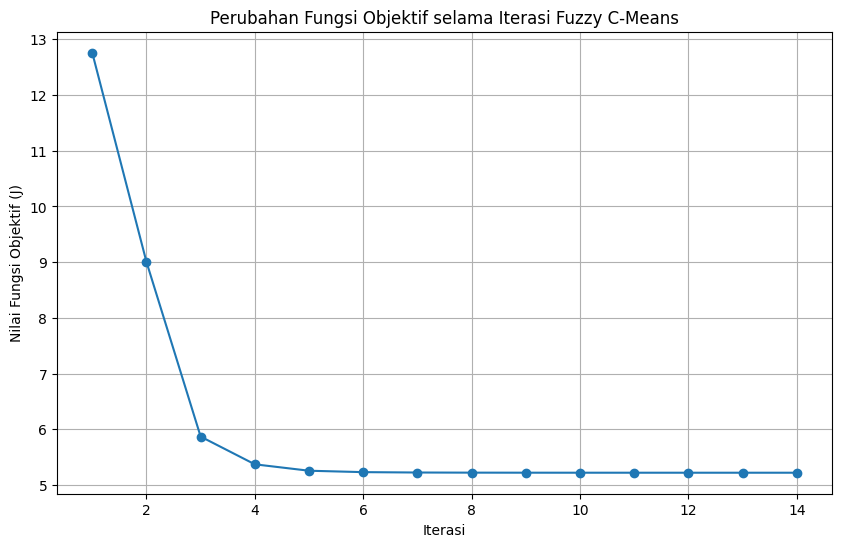

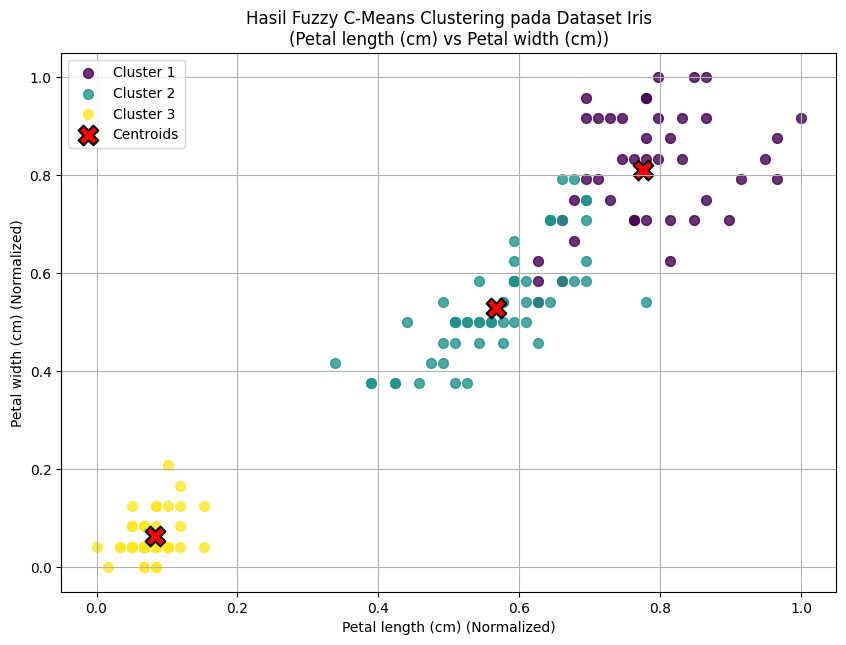

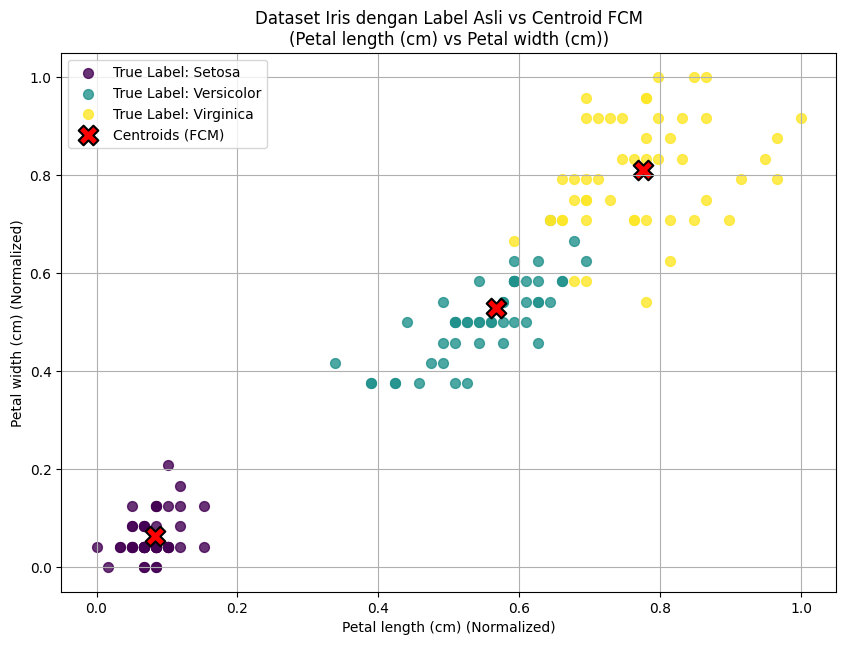

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris # Untuk mendapatkan nama fitur dan label asli

feature_names = iris.feature_names
target_names = iris.target_names

# --- Visualisasi 1: Perubahan Fungsi Objektif ---
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(J_history) + 1), J_history, marker='o', linestyle='-')
plt.title('Perubahan Fungsi Objektif selama Iterasi Fuzzy C-Means')
plt.xlabel('Iterasi')
plt.ylabel('Nilai Fungsi Objektif (J)')
plt.grid(True)
plt.show()

# --- Visualisasi 2: Hasil Clustering (2D) ---

feature_x_idx = 2 # Indeks untuk Petal Length
feature_y_idx = 3 # Indeks untuk Petal Width

plt.figure(figsize=(10, 7))
# Membuat scatter plot untuk setiap cluster
# Kita bisa menggunakan colormaps untuk membedakan cluster
colors_map = plt.cm.viridis(np.linspace(0, 1, n_clusters))

for i in range(n_clusters):
    # Pilih data point yang ditetapkan ke cluster ini
    cluster_points = X_normalized[cluster_assignment_fcm == i]
    plt.scatter(cluster_points[:, feature_x_idx],
                cluster_points[:, feature_y_idx],
                s=50, alpha=0.8, color=colors_map[i],
                label=f'Cluster {i+1}')

# Menambahkan centroid
plt.scatter(centroids[:, feature_x_idx],
            centroids[:, feature_y_idx],
            c='red', marker='X', s=200, label='Centroids', edgecolors='black', linewidth=1.5)

plt.title(f'Hasil Fuzzy C-Means Clustering pada Dataset Iris\n({feature_names[feature_x_idx].capitalize()} vs {feature_names[feature_y_idx].capitalize()})')
plt.xlabel(f'{feature_names[feature_x_idx].capitalize()} (Normalized)')
plt.ylabel(f'{feature_names[feature_y_idx].capitalize()} (Normalized)')
plt.legend()
plt.grid(True)
plt.show()

# --- Visualisasi 3: Scatter Plot dengan Label Asli (untuk perbandingan visual) ---
# Ini tidak wajib, tetapi sering membantu untuk membandingkan cluster yang ditemukan
# dengan bagaimana data tersebut secara alami dikelompokkan oleh label asli.

plt.figure(figsize=(10, 7))
# Membuat scatter plot untuk setiap spesies asli
for i in range(n_clusters): # Karena ada 3 spesies di Iris
    species_points = X_normalized[y_true == i]
    plt.scatter(species_points[:, feature_x_idx],
                species_points[:, feature_y_idx],
                s=50, alpha=0.8, color=colors_map[i],
                label=f'True Label: {target_names[i].capitalize()}')

# Menambahkan centroid (tetap dari hasil FCM)
plt.scatter(centroids[:, feature_x_idx],
            centroids[:, feature_y_idx],
            c='red', marker='X', s=200, label='Centroids (FCM)', edgecolors='black', linewidth=1.5)

plt.title(f'Dataset Iris dengan Label Asli vs Centroid FCM\n({feature_names[feature_x_idx].capitalize()} vs {feature_names[feature_y_idx].capitalize()})')
plt.xlabel(f'{feature_names[feature_x_idx].capitalize()} (Normalized)')
plt.ylabel(f'{feature_names[feature_y_idx].capitalize()} (Normalized)')
plt.legend()
plt.grid(True)
plt.show()

# Decition Tree Classifier

Decision Tree adalah salah satu algoritma machine learning berbasis pohon yang digunakan untuk klasifikasi maupun regresi. Dalam konteks klasifikasi, decision tree bekerja dengan memecah data ke dalam cabang-cabang berdasarkan fitur-fitur tertentu, hingga mencapai keputusan pada daun (leaf) yang menunjukkan label kelas.

Visualisasi decision tree menyerupai struktur pohon:
*   Root (akar): node awal, tempat pengambilan keputusan pertama.
*   Internal Nodes: node yang memuat pertanyaan atau kondisi berbasis fitur.
*   Branches (cabang): jalur hasil dari suatu kondisi.
*  Leaf Nodes: hasil akhir berupa label kelas.



## Langkah-Langkah Menghitung Decision Tree Secara Manual (dengan implementasi pada excel).

Data
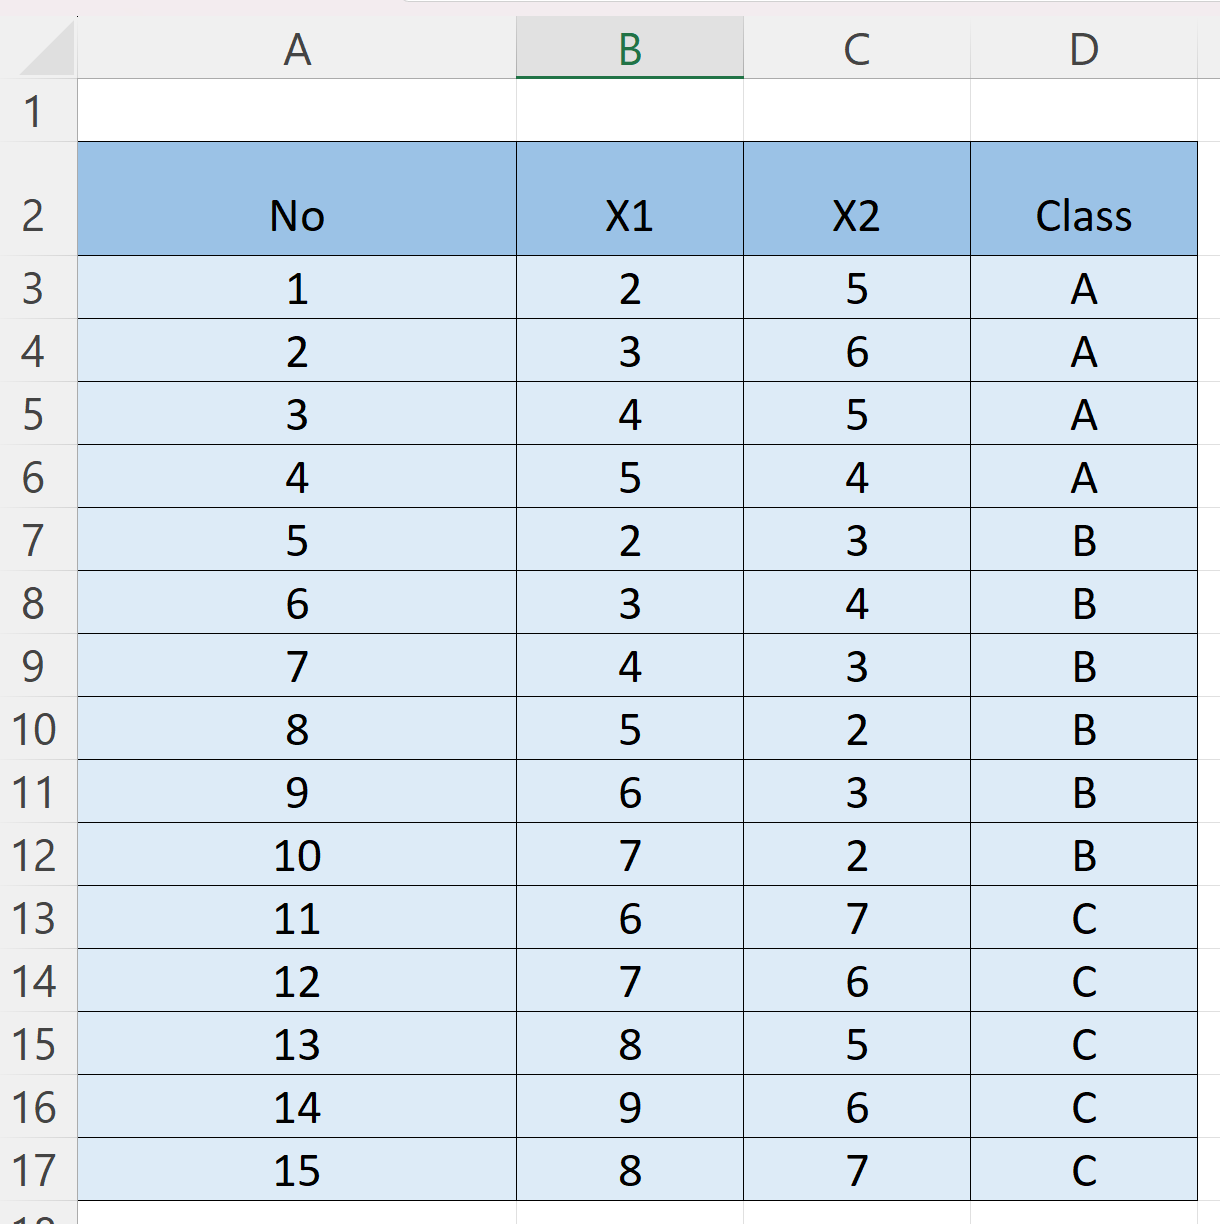

###  Langkah 1: Hitung Entropy Awal (Parent Node)
Entropy menggambarkan ketidakteraturan/ketidakmurnian suatu himpunan:

$$
\text{Entropy}(S) = - \sum_{i=1}^{n} p_i \cdot \log_2(p_i)
$$

 Keterangan:

$S$: Sekumpulan data (dataset atau subset).

$n$: Jumlah kelas (label) dalam data.

$p_i$: Proporsi (peluang) dari kelas ke- $i$, yaitu:



  $$
  p_i = \frac{\text{jumlah data dengan kelas ke-}i}{\text{total data}}
  $$


$\log_2$: Logaritma basis 2.

---

⚠️ Catatan:
Jika $p_i = 0$, maka $p_i \cdot \log_2(p_i)$ dianggap = 0.

Entropy bernilai:


*  Entropy bernilai 0 jika hanya 1 kelas (murni).
*  Maksimum jika distribusi kelas merata (impuritas tertinggi).




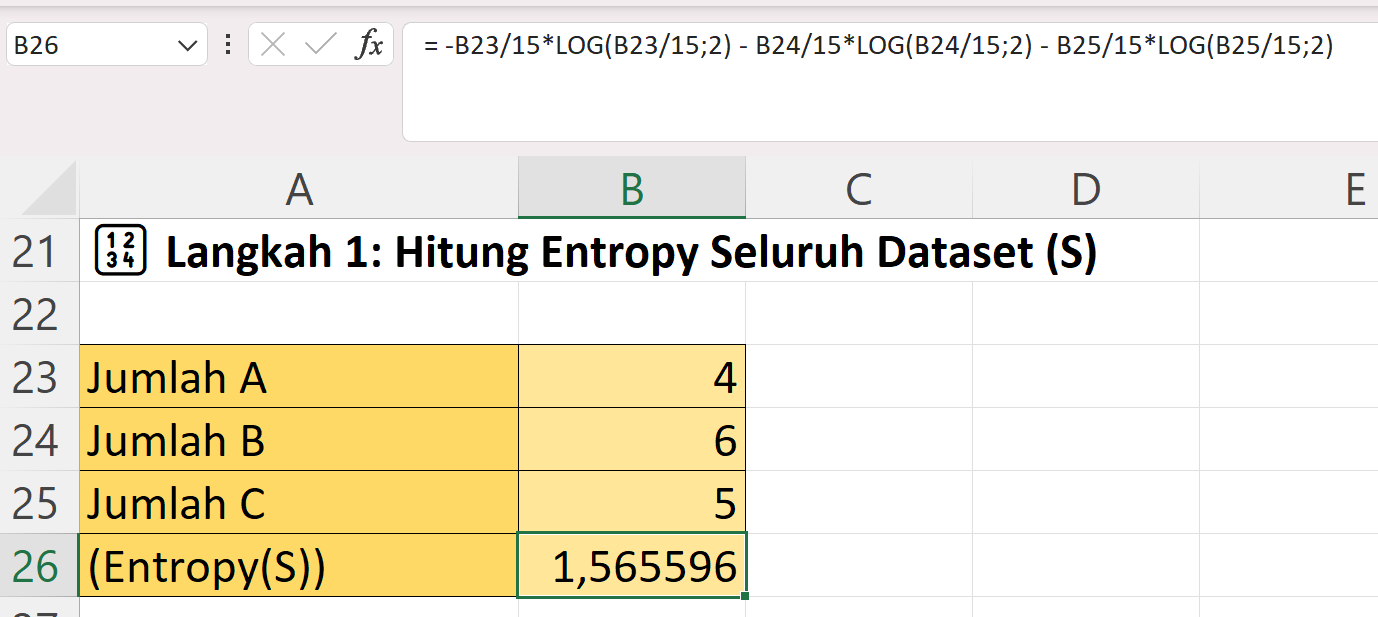

### Langkah 2 Tentukan Kandidat Threshold (Titik Pemisah) paada setiap fitur
Untuk setiap fitur numerik (misalnya X1, X2), urutkan nilainya dan cari nilai tengah (rata-rata dari dua nilai berurutan) sebagai threshold.

Untuk fitur numerik:

1. Urutkan nilai-nilai unik fitur.
2. Hitung semua nilai tengah antara dua nilai berurutan

Titik Threshold dihitung dengan rumus:

$$
\text{Threshold}_{i} = \frac{x_i + x_{i+1}}{2}
$$

Di mana:

* $x_i$ dan $x_{i+1}$ adalah dua nilai berurutan setelah diurutkan.
* Threshold akan menjadi kandidat titik pemisah antar nilai.

#### Fitur 1

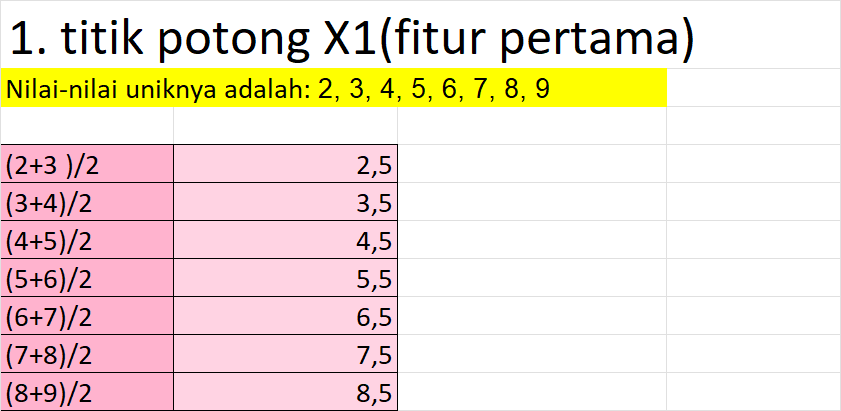

#### Fitur 2
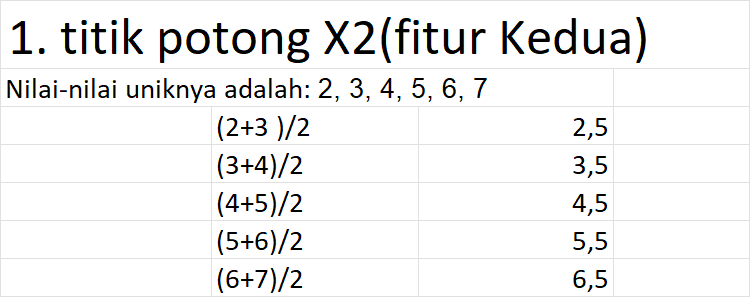


### Langkah 3 Gunakan threshold sebagai batas split
   Bagi data menjadi dua subset:

   * $x \leq \text{Threshold}$
   * $x > \text{Threshold}$

**Fitur 1**
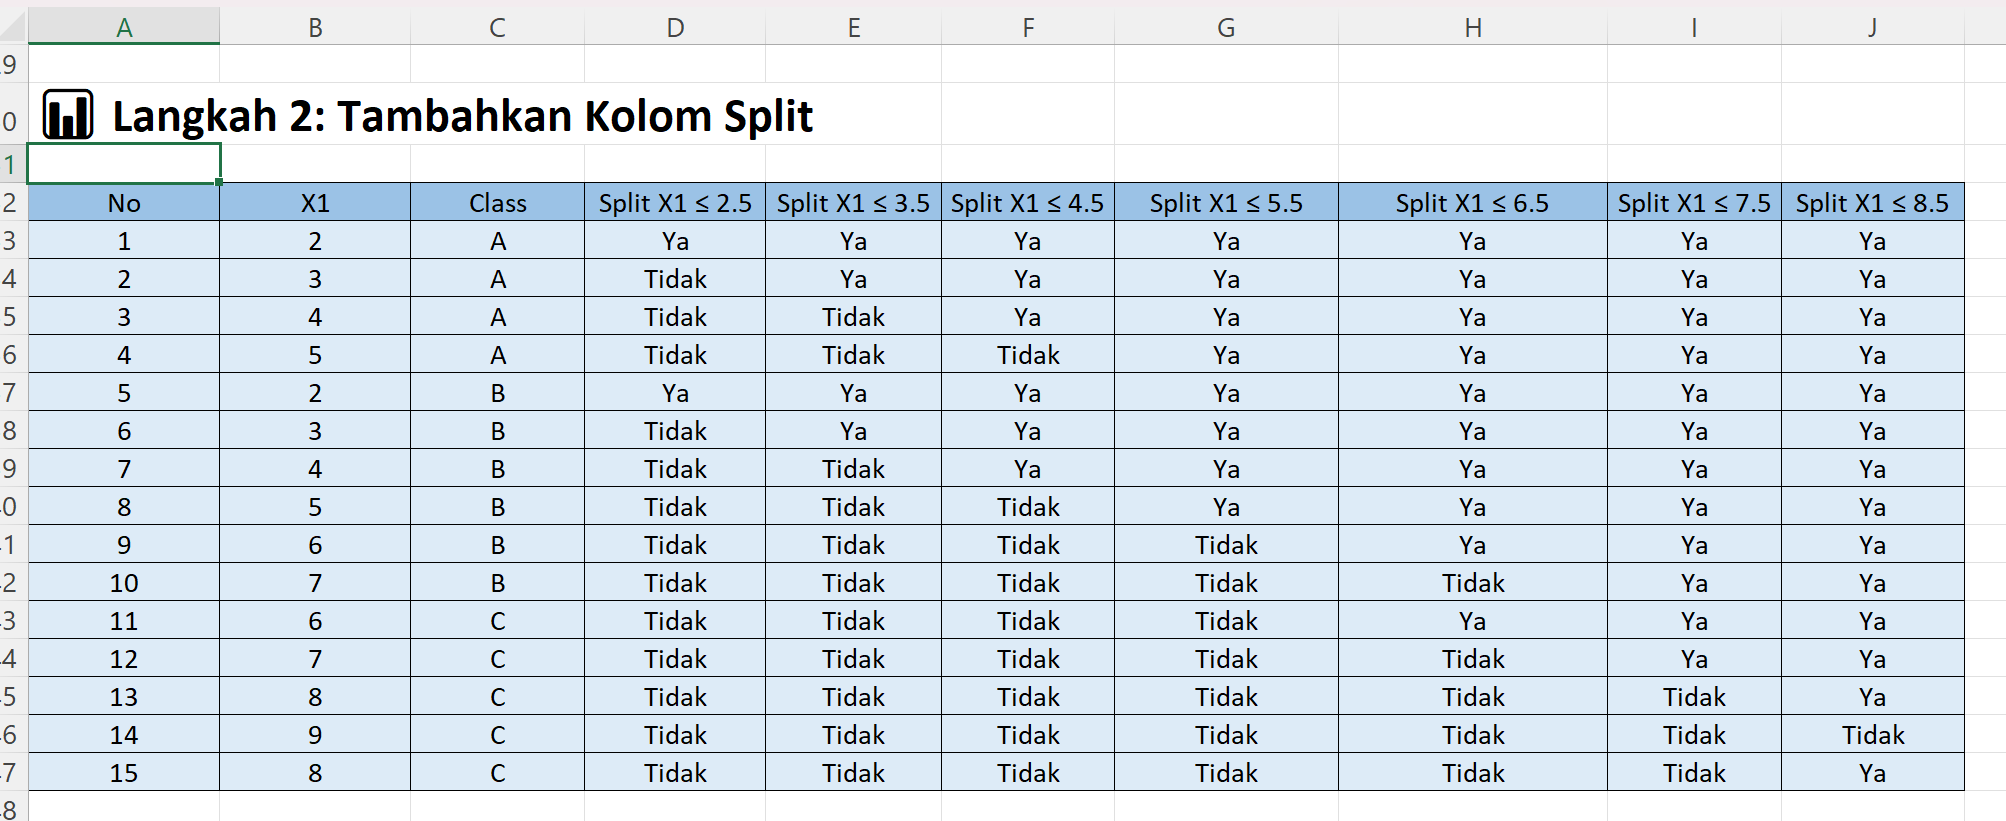

**Fitur 2**
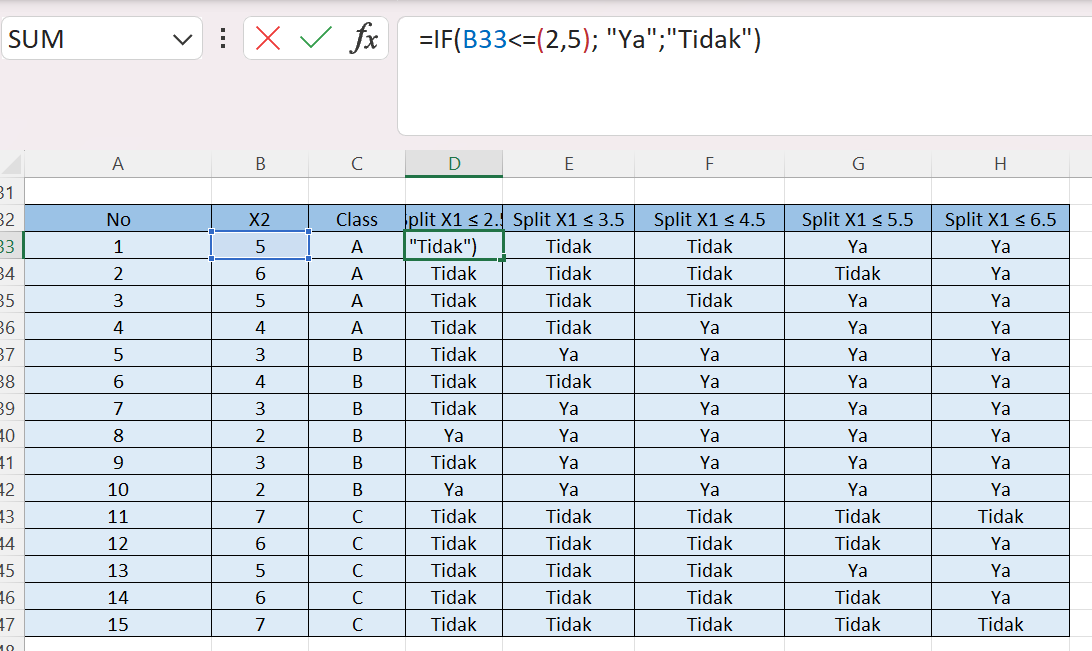

Keterangan:
1. Tidak artinya >=
2. iya artinya <=

### Langkah 4 Hitung Entropy masing-masing subset.
1. Rumus entropy cabang kiri (<=):
$$
\text{Entropy}_{\text{kiri}} = - \sum_{i=1}^{n} p_{i,\text{kiri}} \cdot \log_2(p_{i,\text{kiri}})
$$

2. Rumus entropy cabang Kanan (>=)
$$
\text{Entropy}_{\text{kanan}} = - \sum_{i=1}^{n} p_{i,\text{kanan}} \cdot \log_2(p_{i,\text{kanan}})
$$



### Langkah 5 Hitung Entropy Gabungan (Weighted Entropy)
Gabungkan kedua entropy anak dengan pembobotan berdasarkan jumlah data:

$$
\text{Entropy}_{\text{split}} =
\frac{|S_{\text{kiri}}|}{|S|} \cdot \text{Entropy}_{\text{kiri}} +
\frac{|S_{\text{kanan}}|}{|S|} \cdot \text{Entropy}_{\text{kanan}}
$$



### Langkah 6 Hitung Information Gain
Information Gain mengukur seberapa besar pengurangan ketidakpastian karena split tersebut:

$$
\text{Gain}(S, A) = \text{Entropy}(S) - \text{Entropy}_{\text{split}}
$$



### Langkah 7 Pilih Split dengan Information Gain Terbesar
Ulangi proses di atas untuk semua fitur dan semua kandidat threshold.

Pilih fitur dan threshold dengan nilai Information Gain tertinggi.



### Langkah 8 Lanjutkan ke Cabang Berikutnya (Recursion)
Ulangi proses di atas untuk semua fitur dan semua kandidat threshold.

Pilih fitur dan threshold dengan nilai Information Gain tertinggi.

Untuk setiap node anak hasil split:


*  Ulangi langkah 1–7.
*  Berhenti jika:
  *  UEntropy = 0 (node murni)
  *  Tidak ada lagi fitur/threshold
  *  Jumlah data terlalu sedikit (mis. < min_samples_split)
  * Telah mencapai batas kedalaman (max_depth)



**Berikut adalah hasil dari 7 langkah diatas**

Fitur 1
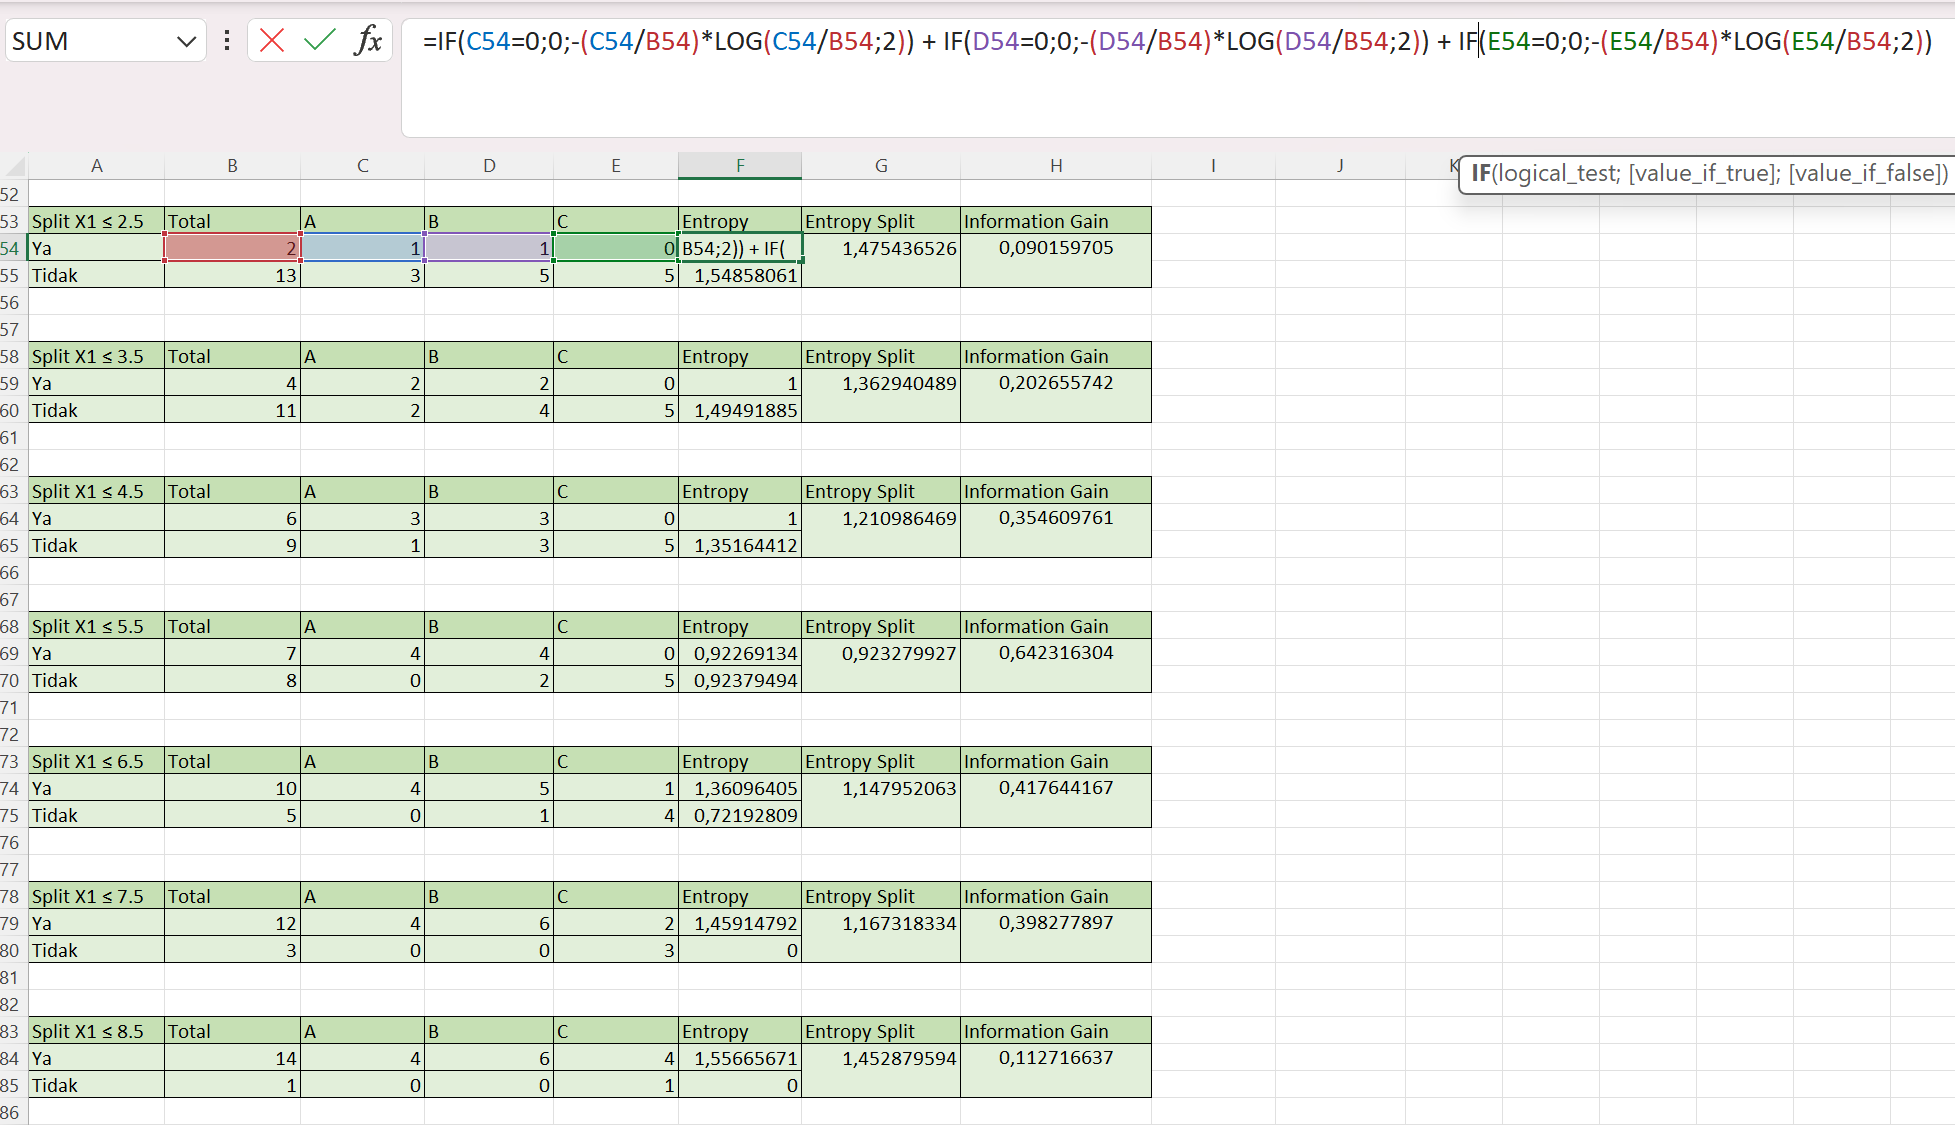
Fitur 2
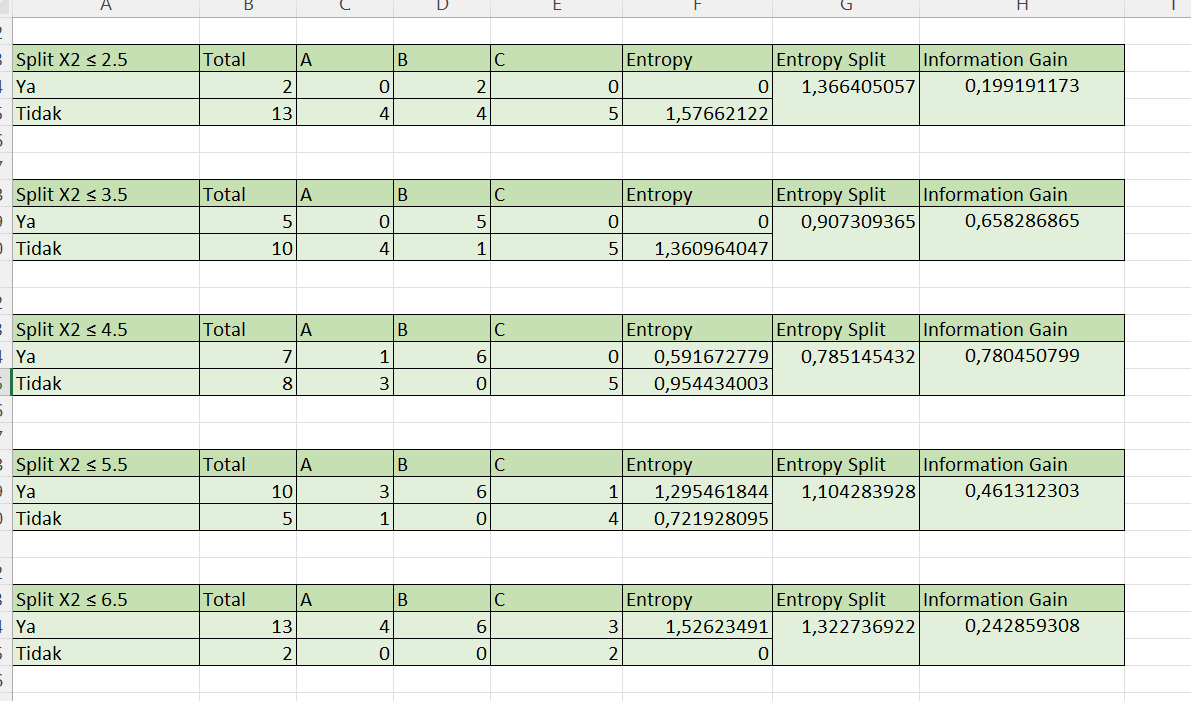

**Kesimpulan**
Information Gain tertinggi ada di fitur 2 dengan titik split 4.5 dan information gain 0,780450799 maka akan dijadikan root pada pohon keputusan

### Code menghitung entropy dan information gain
berikut adalah code untuk menghitung entropy dan information gain setiap threshold sebagai perbandingan dengan perhitungan manual agar kita tahu perhitungan manual benar atau tidak.

In [2]:
import pandas as pd
import numpy as np

# 1. Siapkan Data
data = {
    'No': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'X1': [2, 3, 4, 5, 2, 3, 4, 5, 6, 7, 6, 7, 8, 9, 8],
    'X2': [5, 6, 5, 4, 3, 4, 3, 2, 3, 2, 7, 6, 5, 6, 7],
    'Class': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C']
}
df = pd.DataFrame(data)

# Fungsi untuk menghitung Entropy
def calculate_entropy(labels):
    # Hitung probabilitas setiap kelas
    class_counts = labels.value_counts()
    probabilities = class_counts / len(labels)
    # Hindari log(0) dengan menambahkan epsilon kecil
    entropy = -np.sum(probabilities * np.log2(probabilities + 1e-9))
    return entropy

# Fungsi untuk menghitung Information Gain
def calculate_information_gain(data_parent, feature_name, split_value, target_name):
    parent_entropy = calculate_entropy(data_parent[target_name])

    # Bagi data berdasarkan split value
    left_child = data_parent[data_parent[feature_name] <= split_value]
    right_child = data_parent[data_parent[feature_name] > split_value]

    # Handle kasus di mana salah satu child kosong setelah split
    if len(left_child) == 0 or len(right_child) == 0:
        return -1, parent_entropy, 0, 0, parent_entropy # Mengembalikan IG -1 atau 0 jika split tidak valid/kosong

    # Hitung entropy untuk setiap child
    entropy_left = calculate_entropy(left_child[target_name])
    entropy_right = calculate_entropy(right_child[target_name])

    # Hitung entropy tertimbang (weighted entropy)
    weight_left = len(left_child) / len(data_parent)
    weight_right = len(right_child) / len(data_parent)
    weighted_entropy = (weight_left * entropy_left) + (weight_right * entropy_right)

    # Hitung Information Gain
    information_gain = parent_entropy - weighted_entropy
    return information_gain, parent_entropy, entropy_left, entropy_right, weighted_entropy

# 2. Hitung Entropy Awal (Parent Node - Seluruh Data)
initial_entropy = calculate_entropy(df['Class'])
print(f"Entropy Awal (Parent Node - Seluruh Data): {initial_entropy:.4f}\n")

# 3. Iterasi dan Hitung Information Gain untuk setiap fitur dan SEMUA titik split potensial
results = []
features_to_analyze = ['X1', 'X2']

for feature_name in features_to_analyze:
    print(f"--- Analisis untuk Fitur {feature_name} ---")

    # Dapatkan semua nilai unik untuk fitur tersebut sebagai kandidat batas split
    unique_values = sorted(df[feature_name].unique())

    # Titik split biasanya diambil di tengah antara dua nilai berurutan.
    # Ini mencakup semua kemungkinan pemisahan data berdasarkan nilai fitur.
    split_points = []
    if len(unique_values) > 1:
        split_points = [(unique_values[i] + unique_values[i+1]) / 2 for i in range(len(unique_values) - 1)]
    # Tambahan: untuk kasus edge di mana hanya ada satu nilai unik, atau untuk memastikan split paling rendah/tinggi
    # Meskipun pada data ini tidak akan terjadi karena ada banyak nilai unik
    elif len(unique_values) == 1:
        split_points = [unique_values[0] - 0.5] # Ambil nilai di bawahnya

    for split_val in split_points:
        ig, p_ent, l_ent, r_ent, w_ent = calculate_information_gain(df, feature_name, split_val, 'Class')

        # Hanya simpan split yang valid (IG >= 0)
        if ig >= 0:
            results.append({
                'Feature': feature_name,
                'Split_Value': split_val,
                'Parent_Entropy': p_ent,
                'Left_Child_Entropy': l_ent,
                'Right_Child_Entropy': r_ent,
                'Weighted_Entropy': w_ent,
                'Information_Gain': ig
            })
            print(f"Split {feature_name} <= {split_val}:")
            print(f"  Jumlah Kiri: {len(df[df[feature_name] <= split_val])}, Jumlah Kanan: {len(df[df[feature_name] > split_val])}")
            print(f"  Entropy Kiri: {l_ent:.4f}, Entropy Kanan: {r_ent:.4f}")
            print(f"  Weighted Entropy: {w_ent:.4f}")
            print(f"  Information Gain: {ig:.4f}\n")
        else:
            print(f"Split {feature_name} <= {split_val}: (Split ini menghasilkan child kosong, IG diabaikan)\n")


# Tampilkan hasil dalam bentuk DataFrame untuk perbandingan yang lebih mudah
results_df = pd.DataFrame(results)
print("\n### Ringkasan Perhitungan Entropy dan Information Gain per SEMUA Titik Split Potensial ###")
# Urutkan berdasarkan Information Gain tertinggi untuk melihat split terbaik dengan cepat
print(results_df.sort_values(by='Information_Gain', ascending=False).to_string())

# Temukan split terbaik secara keseluruhan dari semua yang dihitung
best_overall_split = results_df.loc[results_df['Information_Gain'].idxmax()]
print("\n--- Split Terbaik Keseluruhan (Maksimum Information Gain) ---")
print(best_overall_split.to_string())

Entropy Awal (Parent Node - Seluruh Data): 1.5656

--- Analisis untuk Fitur X1 ---
Split X1 <= 2.5:
  Jumlah Kiri: 2, Jumlah Kanan: 13
  Entropy Kiri: 1.0000, Entropy Kanan: 1.5486
  Weighted Entropy: 1.4754
  Information Gain: 0.0902

Split X1 <= 3.5:
  Jumlah Kiri: 4, Jumlah Kanan: 11
  Entropy Kiri: 1.0000, Entropy Kanan: 1.4949
  Weighted Entropy: 1.3629
  Information Gain: 0.2027

Split X1 <= 4.5:
  Jumlah Kiri: 6, Jumlah Kanan: 9
  Entropy Kiri: 1.0000, Entropy Kanan: 1.3516
  Weighted Entropy: 1.2110
  Information Gain: 0.3546

Split X1 <= 5.5:
  Jumlah Kiri: 8, Jumlah Kanan: 7
  Entropy Kiri: 1.0000, Entropy Kanan: 0.8631
  Weighted Entropy: 0.9361
  Information Gain: 0.6295

Split X1 <= 6.5:
  Jumlah Kiri: 10, Jumlah Kanan: 5
  Entropy Kiri: 1.3610, Entropy Kanan: 0.7219
  Weighted Entropy: 1.1480
  Information Gain: 0.4176

Split X1 <= 7.5:
  Jumlah Kiri: 12, Jumlah Kanan: 3
  Entropy Kiri: 1.4591, Entropy Kanan: -0.0000
  Weighted Entropy: 1.1673
  Information Gain: 0.3983



## Hasil Pohon Menggunakan Library DecisionTreeClassifier dari sklearn.tree

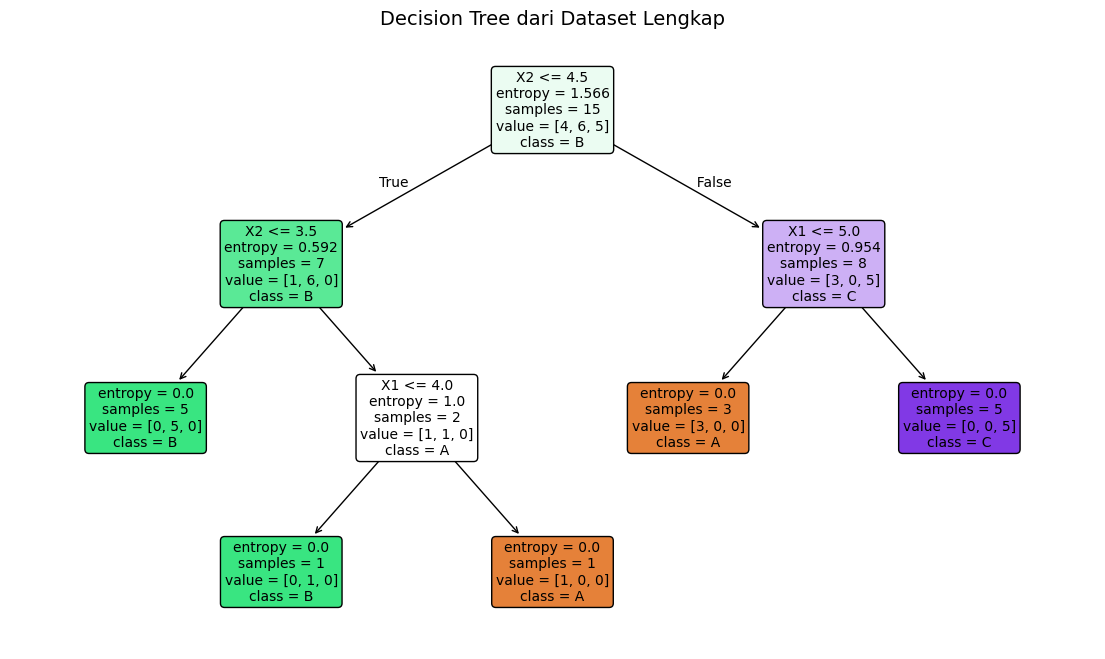

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Data kamu
data = {
    'X1': [2, 3, 4, 5, 2, 3, 4, 5, 6, 7, 6, 7, 8, 9, 8],
    'X2': [5, 6, 5, 4, 3, 4, 3, 2, 3, 2, 7, 6, 5, 6, 7],
    'Class': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C']
}

df = pd.DataFrame(data)

# Pisahkan fitur dan target
X = df[['X1', 'X2']]
y = df['Class']

# Buat model decision tree (gunakan entropy agar sesuai dengan perhitungan manual)
tree_model = DecisionTreeClassifier(
    criterion='entropy',     # Gunakan information gain
    splitter='best',
    max_depth=None,          # Biarkan berkembang penuh
    random_state=42
)

# Latih model
tree_model.fit(X, y)

# Visualisasi decision tree lengkap
plt.figure(figsize=(14, 8))
plot_tree(
    tree_model,
    feature_names=['X1', 'X2'],
    class_names=tree_model.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree dari Dataset Lengkap", fontsize=14)
plt.show()


 Rule yang dihasilkan:

Rule 1:
Jika X2 ≤ 4.5 dan X2 ≤ 3.5
→ Class = B

Rule 2:
Jika X2 ≤ 4.5 dan X2 > 3.5 dan X1 ≤ 4.0
→ Class = B

Rule 3:
Jika X2 ≤ 4.5 dan X2 > 3.5 dan X1 > 4.0
→ Class = A

Rule 4:
Jika X2 > 4.5 dan X1 ≤ 5.0
→ Class = A

Rule 5:
Jika X2 > 4.5 dan X1 > 5.0
→ Class = C

### Visualisasi data saat split

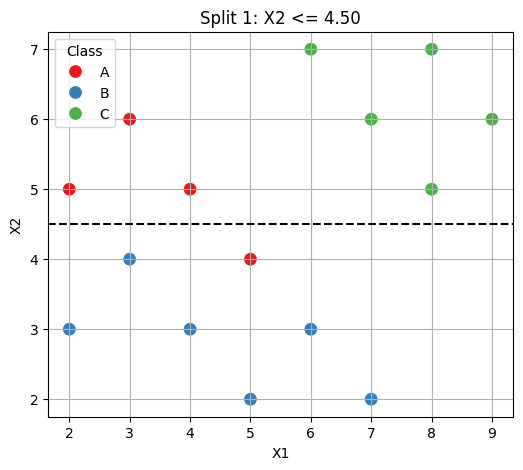

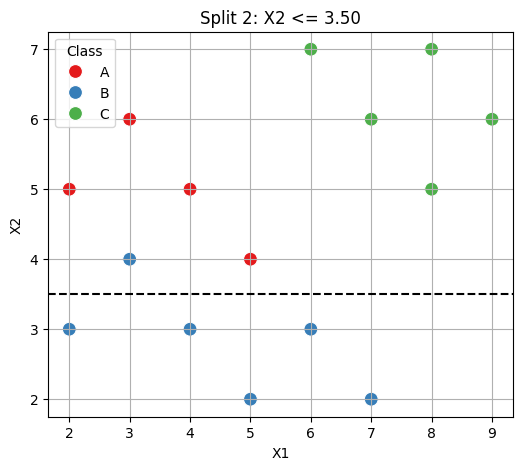

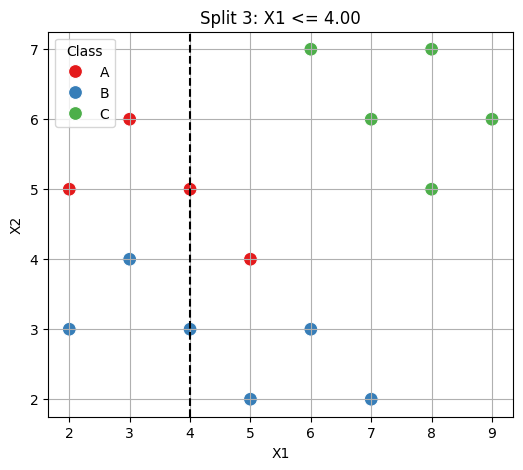

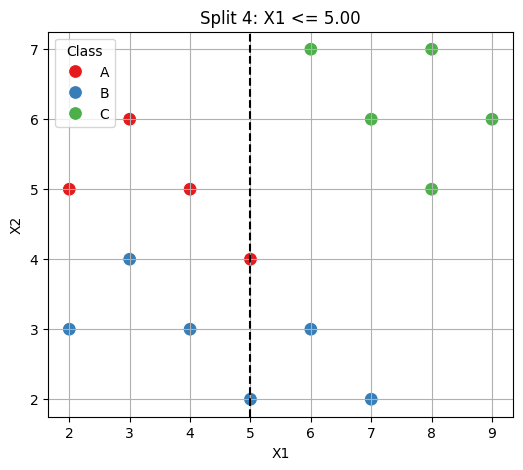

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, _tree
import matplotlib.pyplot as plt
import seaborn as sns

# Data asli
data = {
   'X1': [2, 3, 4, 5, 2, 3, 4, 5, 6, 7, 6, 7, 8, 9, 8],
    'X2': [5, 6, 5, 4, 3, 4, 3, 2, 3, 2, 7, 6, 5, 6, 7],
    'Class': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C']
}
df = pd.DataFrame(data)

# Model decision tree
X = df[['X1', 'X2']]
y = df['Class']
tree_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_model.fit(X, y)

# Fungsi untuk ekstrak split dari pohon keputusan
def extract_splits(tree, feature_names):
    tree_ = tree.tree_
    feature = tree_.feature
    threshold = tree_.threshold

    paths = []

    def recurse(node, path=[]):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_names[feature[node]]
            thresh = threshold[node]
            paths.append((name, thresh))
            recurse(tree_.children_left[node], path + [(name, "<=", thresh)])
            recurse(tree_.children_right[node], path + [(name, ">", thresh)])

    recurse(0)
    return paths

# Ambil daftar split unik
splits = extract_splits(tree_model, X.columns.tolist())
unique_splits = []
seen = set()
for s in splits:
    if (s[0], s[1]) not in seen:
        unique_splits.append(s)
        seen.add((s[0], s[1]))

# Fungsi untuk visualisasi berdasarkan split
def plot_split(data, feature, threshold, title=''):
    plt.figure(figsize=(6, 5))
    sns.scatterplot(data=data, x='X1', y='X2', hue='Class', s=100, palette='Set1')
    if feature == 'X1':
        plt.axvline(x=threshold, color='black', linestyle='--')
    elif feature == 'X2':
        plt.axhline(y=threshold, color='black', linestyle='--')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Visualisasikan semua split secara berurutan
for i, (feat, thresh) in enumerate(unique_splits, start=1):
    plot_split(df, feature=feat, threshold=thresh, title=f'Split {i}: {feat} <= {thresh:.2f}')


### Data Uji

In [5]:
# Dua data baru untuk diuji
# Format: [X1, X2]
data_uji = pd.DataFrame([
    [9, 3],   # Data Uji 1
    [15, 6]    # Data Uji 2
], columns=['X1', 'X2'])

# Prediksi kelas untuk data uji
prediksi = tree_model.predict(data_uji)

# Tampilkan hasil
for i, (x, y) in enumerate(data_uji.values):
    print(f"Data Uji {i+1} (X1={x}, X2={y}) diprediksi sebagai kelas: {prediksi[i]}")


Data Uji 1 (X1=9, X2=3) diprediksi sebagai kelas: B
Data Uji 2 (X1=15, X2=6) diprediksi sebagai kelas: C


Penjelasan :


1.   Data Uji pertama X1 = 9 dan X2 = 3
  *   Mengggunakan rule 1 cek X2 = 3 apakah <= 4,5? jika iya cek lagi apakah juga <= 3,5?karena 3 kurang dari 4,5 dan kurang dari 3,5 maka diprediksi masuk ke kelas B.

2. Data Uji kedua X1 = 15 dan X2 = 6
  *   Mengggunakan rule 1 cek X2 = 6 apakah <= 4,5? karena x2 >= 4,5 maka dicek kembali apakah x1 <= 5.0? karena 6 >= 5.0 maka data kedua diprediksi masuk ke kelas C.



